<a href="https://colab.research.google.com/github/OmniaOsama03/Comperative_Analysis_of_Clustering_Algorithms/blob/main/CSC406_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline
sns.set(color_codes=True)

df = pd.read_csv('/content/marketing_campaign.csv', delimiter='\t')


# Preprocessing

##Q1 - General Info on the dataset.

In [ ]:
# How many attributes and how many instances does the dataset train have?

num_attributes = len(df.columns)
num_instances = len(df)

print("Number of attributes:", num_attributes)
print("Number of instances:", num_instances)
pd.set_option('display.max_columns', None)
print(df.head())


Number of attributes: 29
Number of instances: 2240
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               

##Q2 - Exploring the datatypes.

In [ ]:
# 1. Specify the datatype of the attributes (Qualitative vs Quantitative)
qualitative_attributes = df.select_dtypes(include=['object']).columns
quantitative_attributes = df.select_dtypes(include=['int64', 'float64']).columns

print("Qualitative attributes:", qualitative_attributes)
print("Quantitative attributes:", quantitative_attributes)

# 2. How many qualitative and how many quantitative attributes are there in the dataset?
num_qualitative_attributes = len(qualitative_attributes)
num_quantitative_attributes = len(quantitative_attributes)

print("\nNumber of qualitative attributes:", num_qualitative_attributes)
print("Number of quantitative attributes:", num_quantitative_attributes)

Qualitative attributes: Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')
Quantitative attributes: Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

Number of qualitative attributes: 3
Number of quantitative attributes: 26


##Q3 - Identifying continuous & discrete quantitative attributes.

In [ ]:
#Extracting the continuous (float) attributes.
continuous_attributes = df.select_dtypes(include = ['float64']).columns;

#Extracting the discrete (integer) attributes.
discrete_attributes = df.select_dtypes(include = ['int64']).columns;

#Printing the continuous attributes
print("The continuous quantitative attributes: \n")
for attribute in continuous_attributes:
  print(attribute)

print("_______________________________________________")

#Printing the discrete attributes
print("The discrete quantitative attributes: \n")
for attribute in discrete_attributes:
  print(attribute)

The continuous quantitative attributes: 

Income
_______________________________________________
The discrete quantitative attributes: 

ID
Year_Birth
Kidhome
Teenhome
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response


##Q4 - Skewness of different attributes

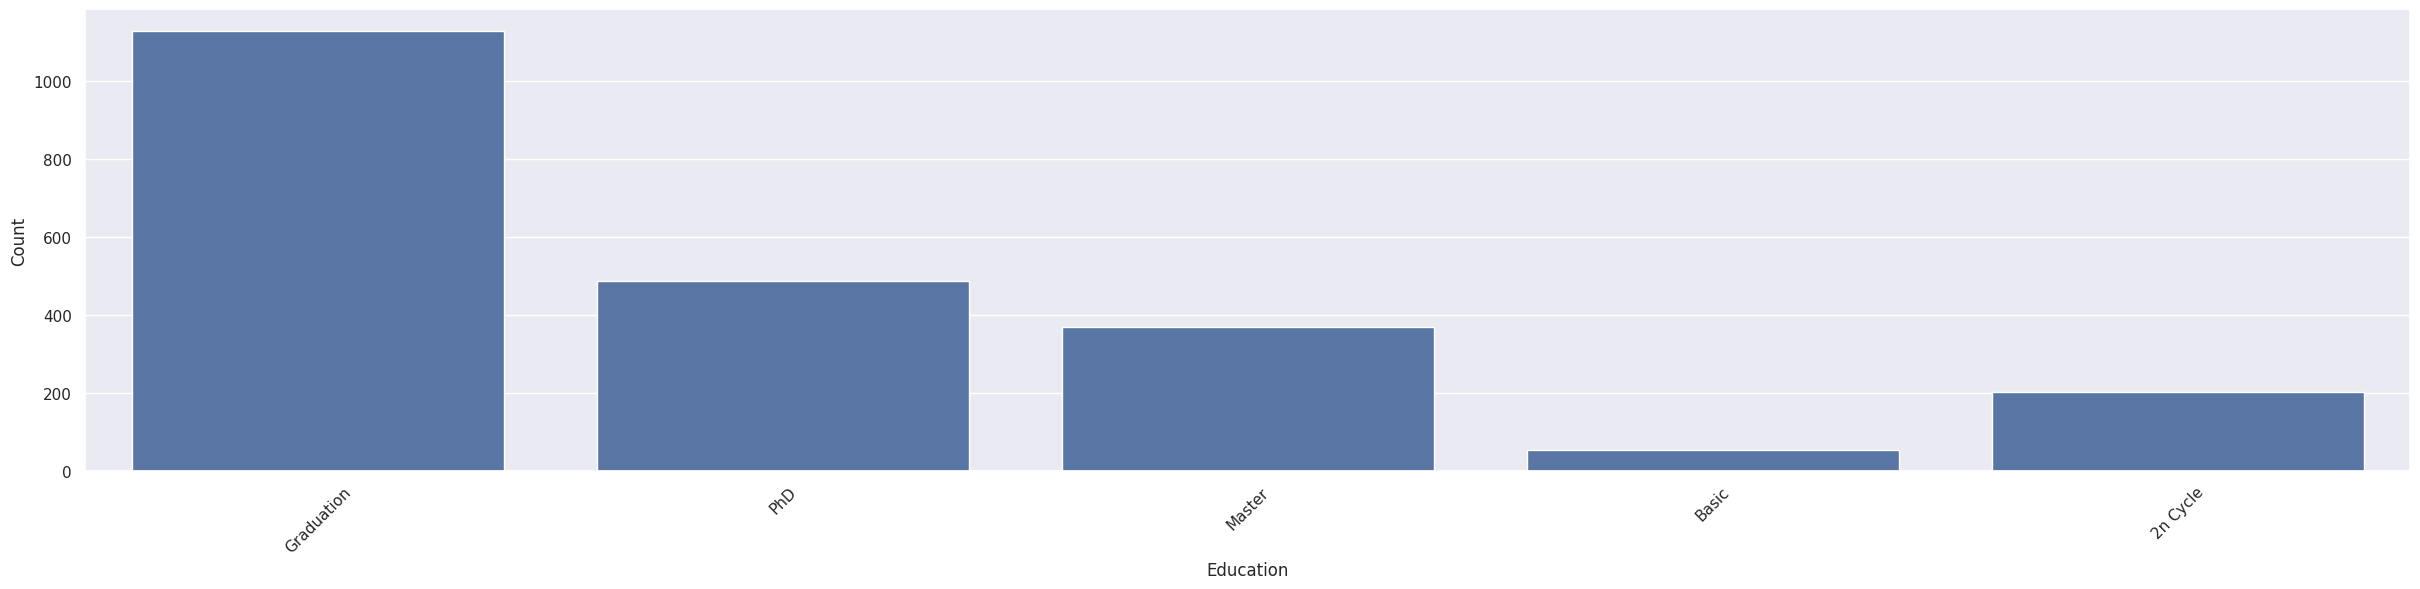

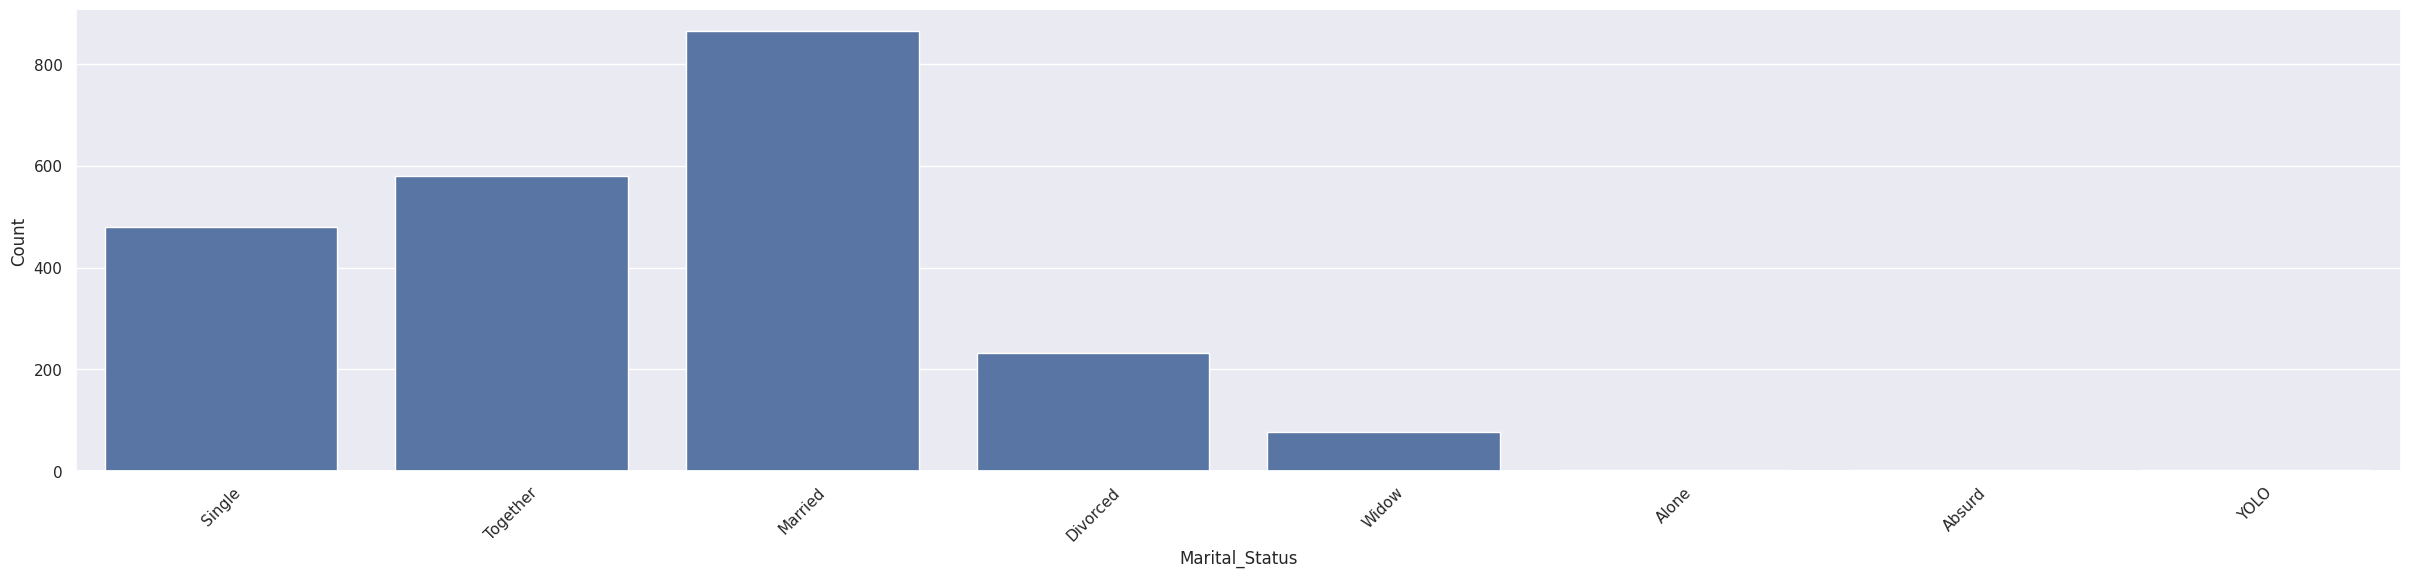

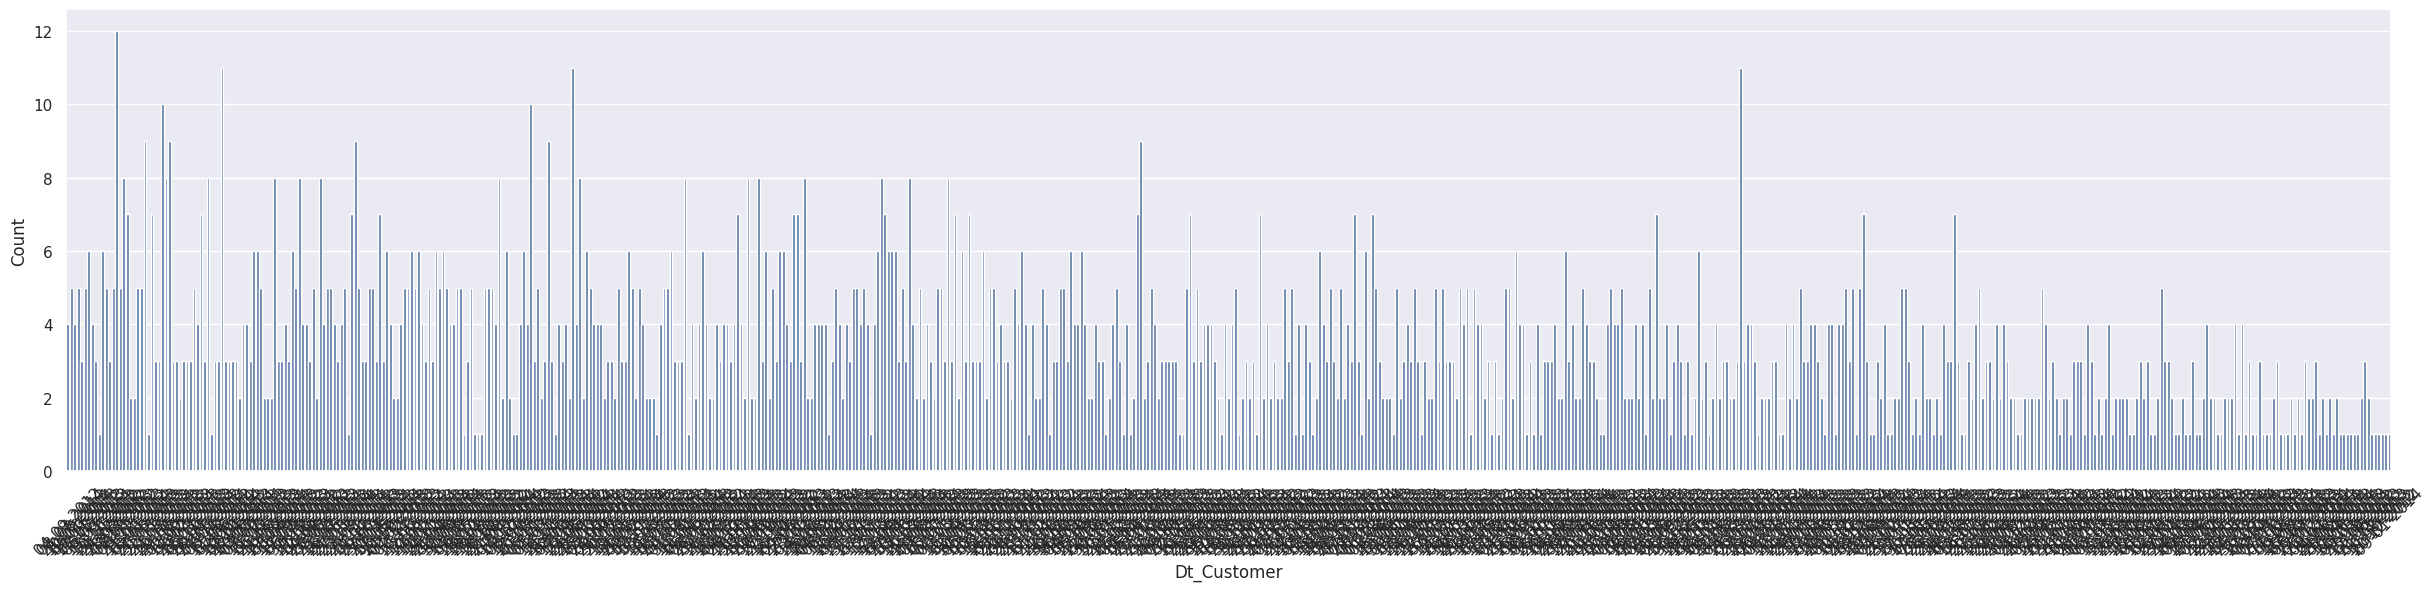

In [ ]:
#Univariate analysis for categorical columns (through bar plots)

#Extracting the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(30, 6))
    sns.countplot(data = df, x = column)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

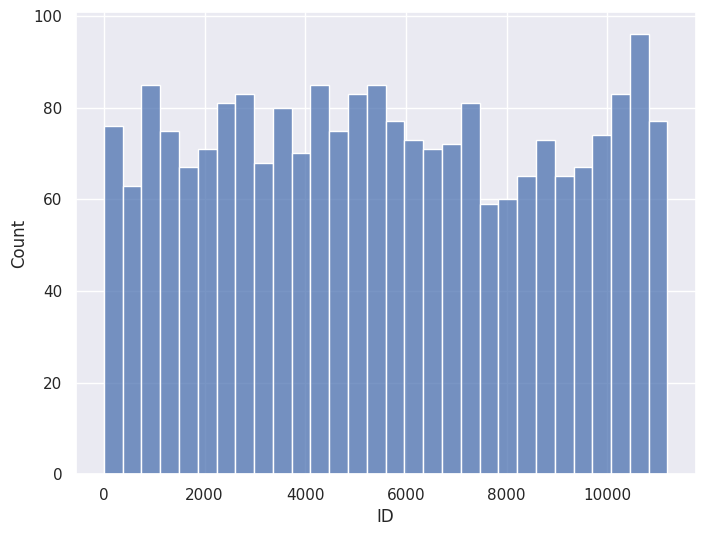

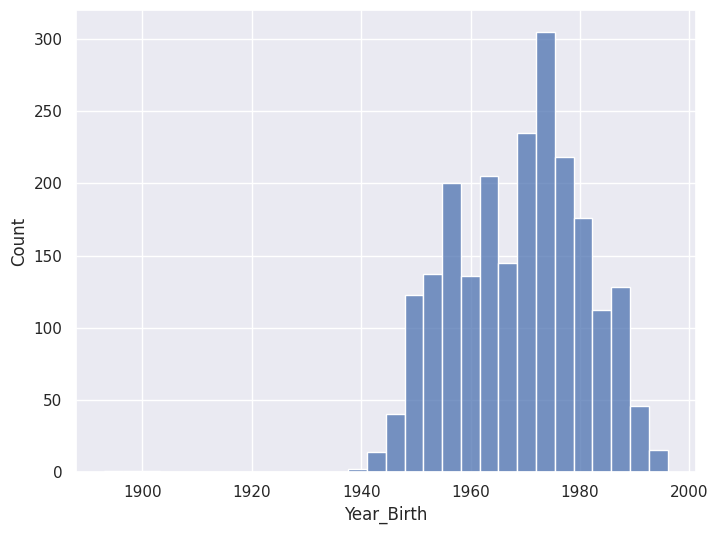

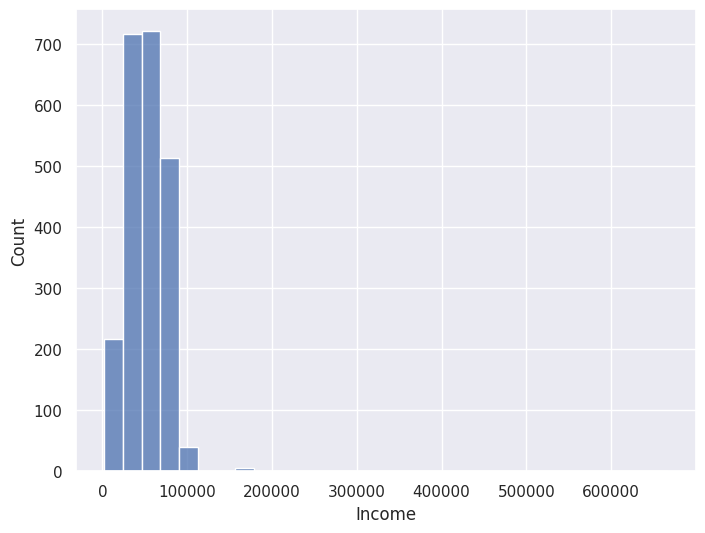

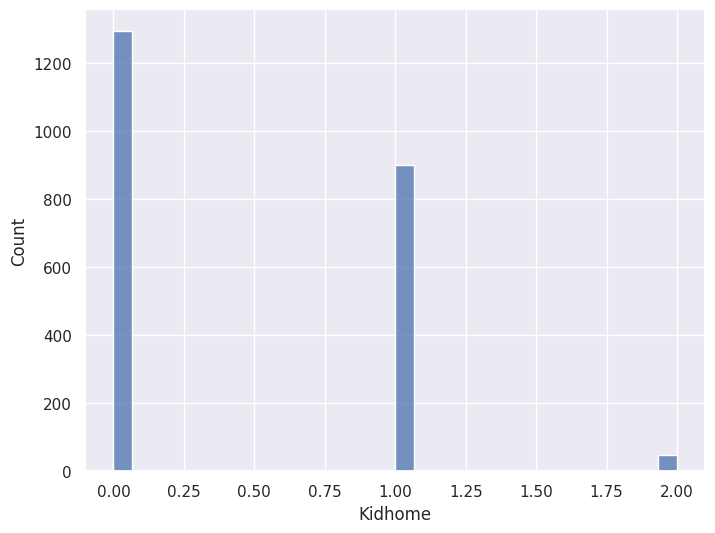

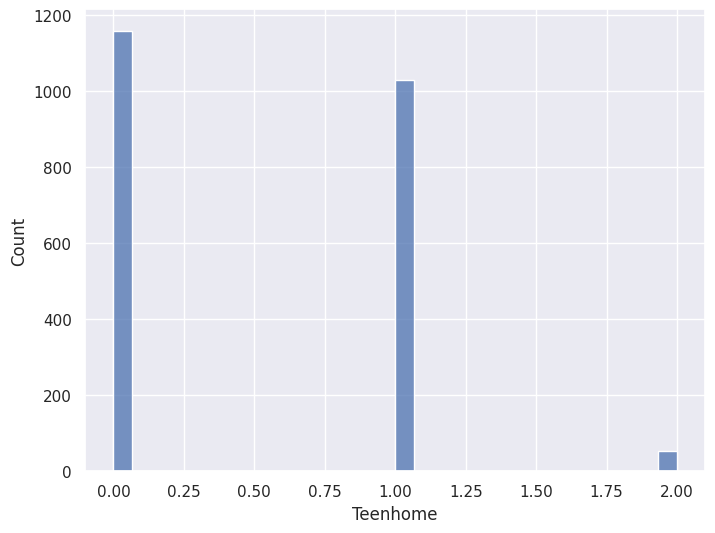

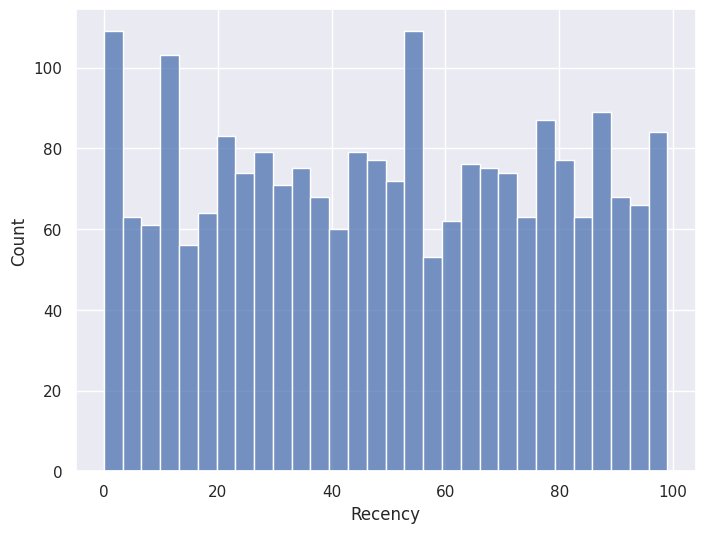

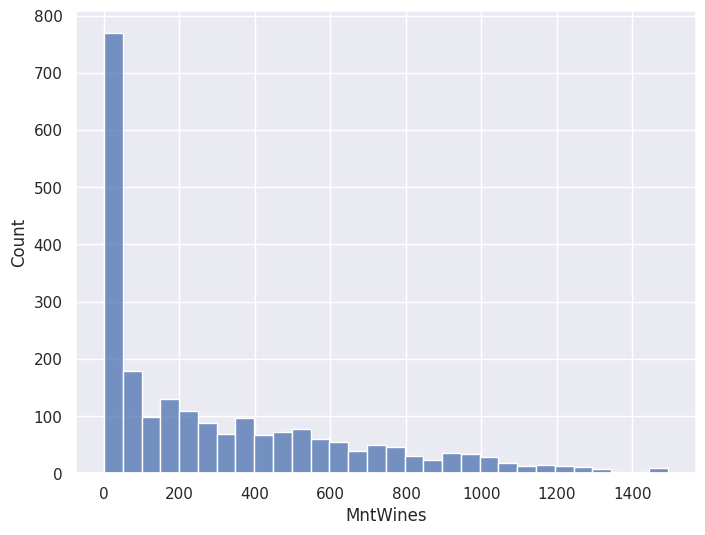

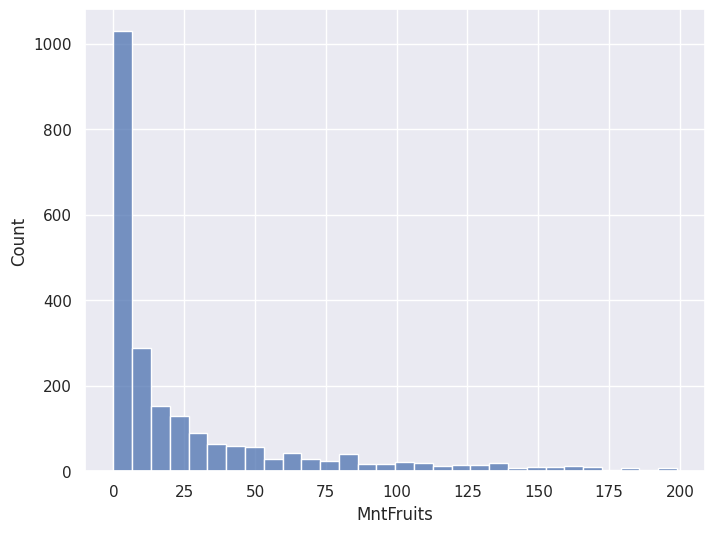

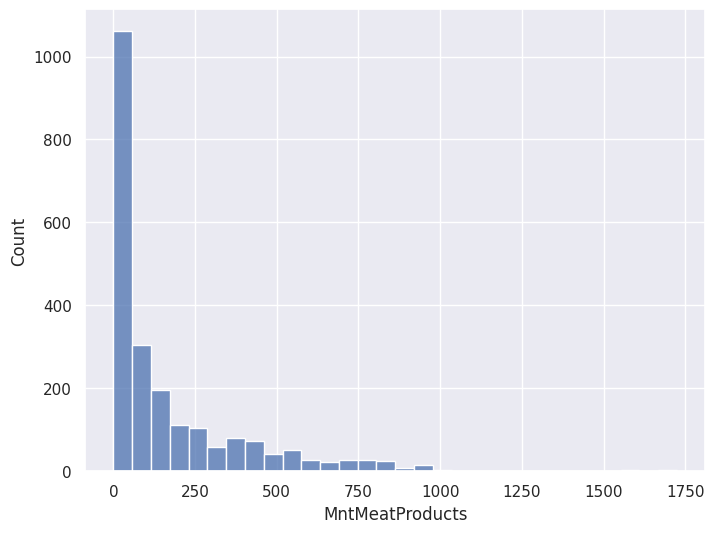

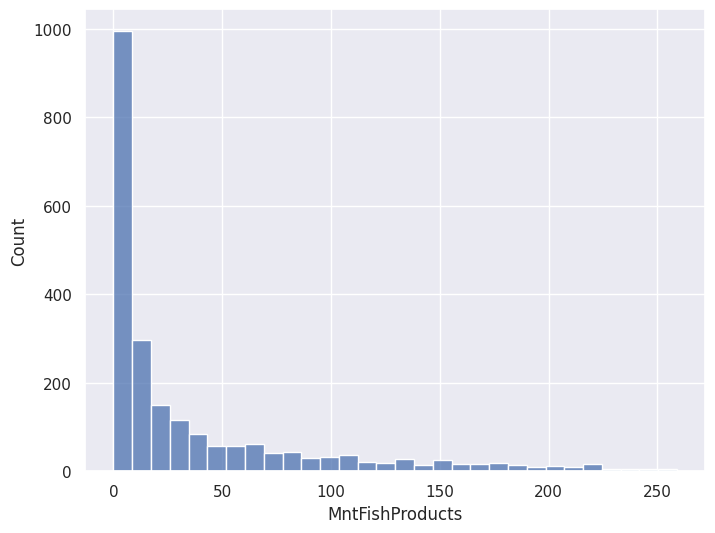

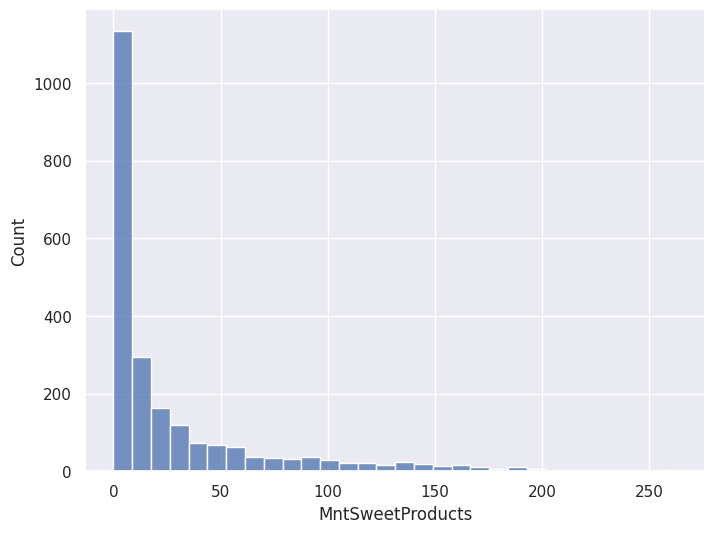

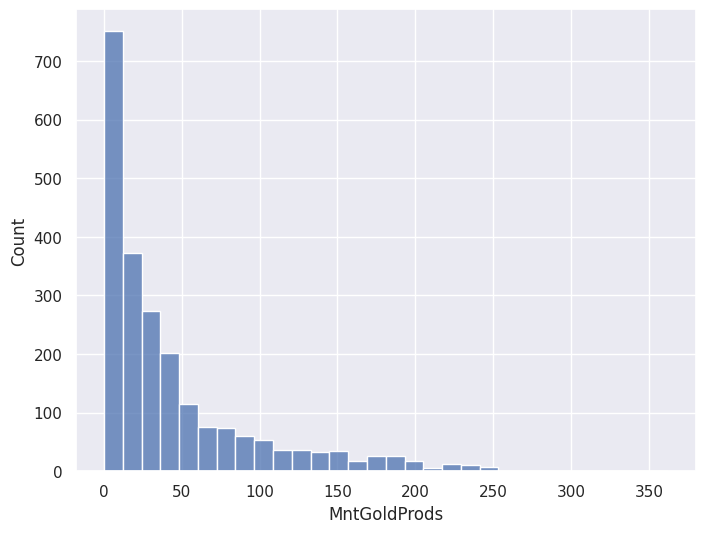

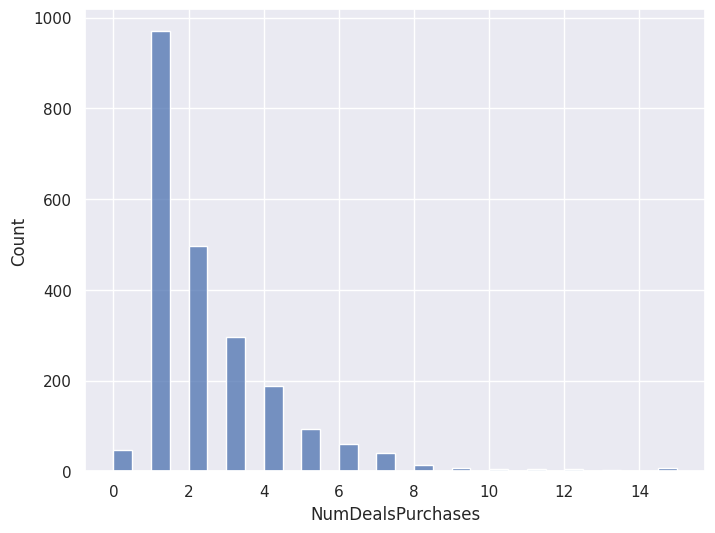

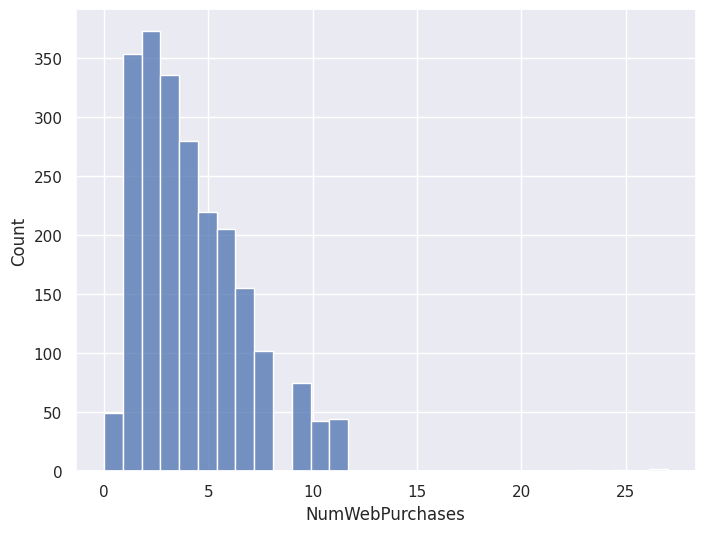

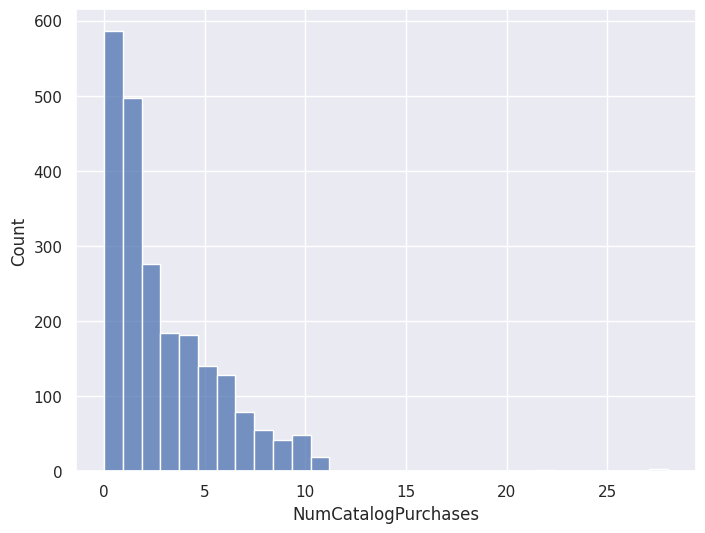

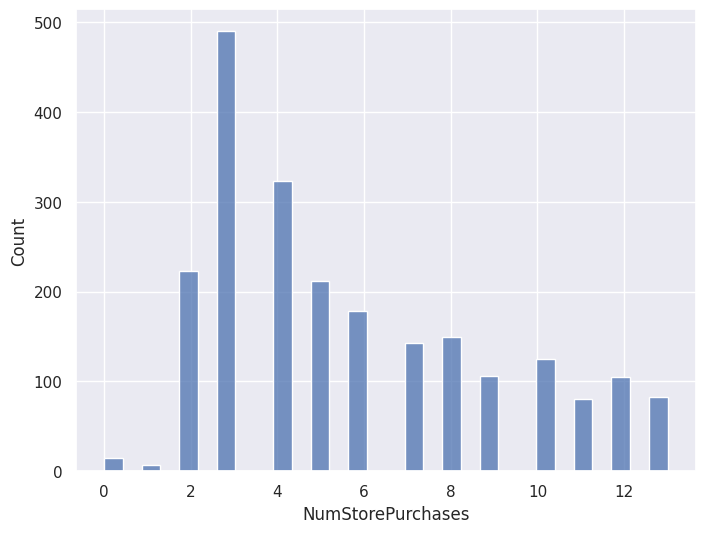

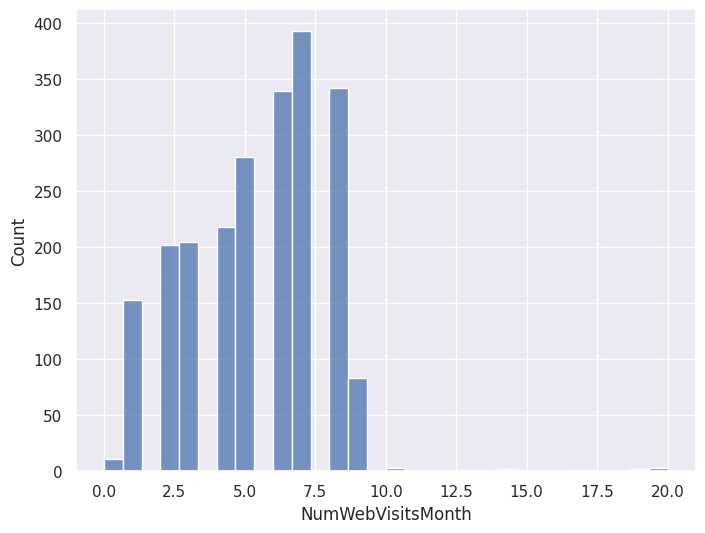

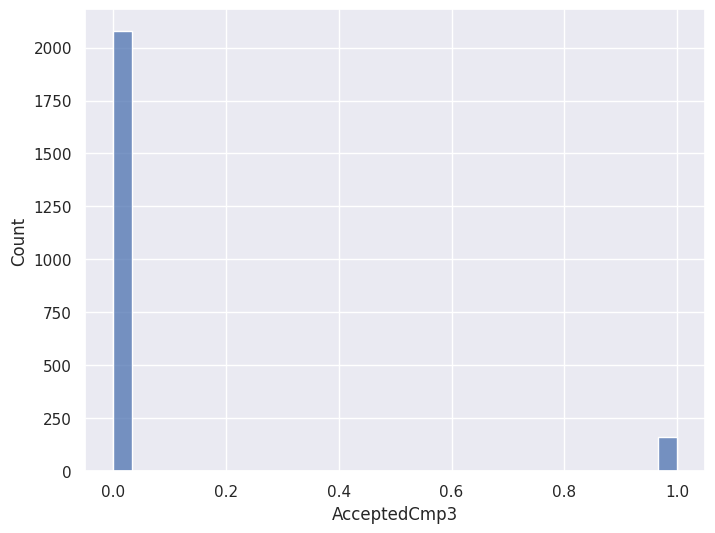

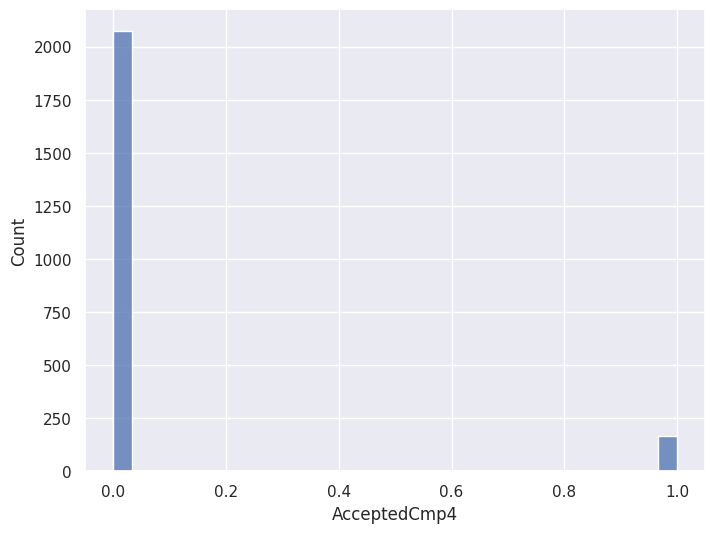

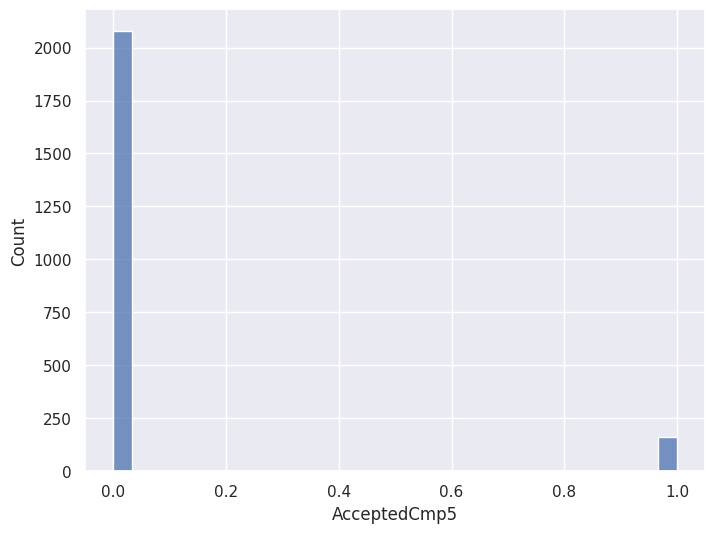

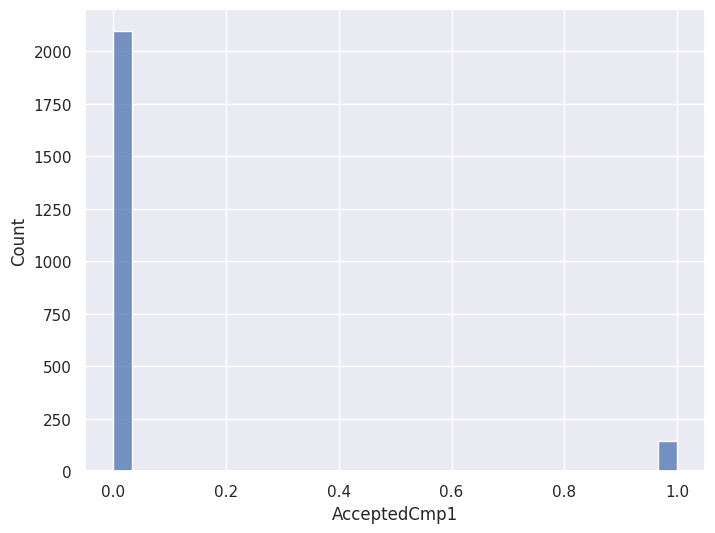

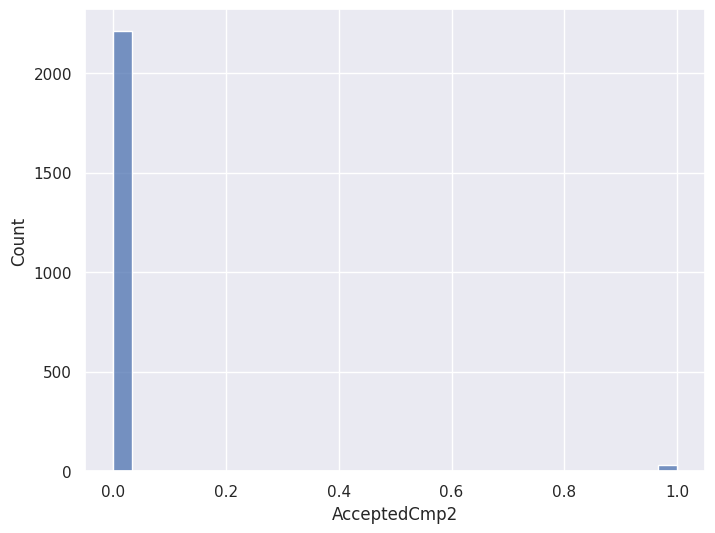

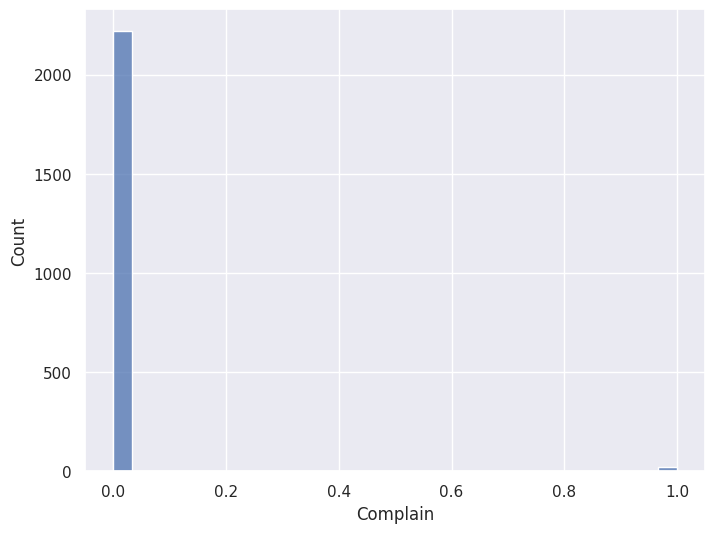

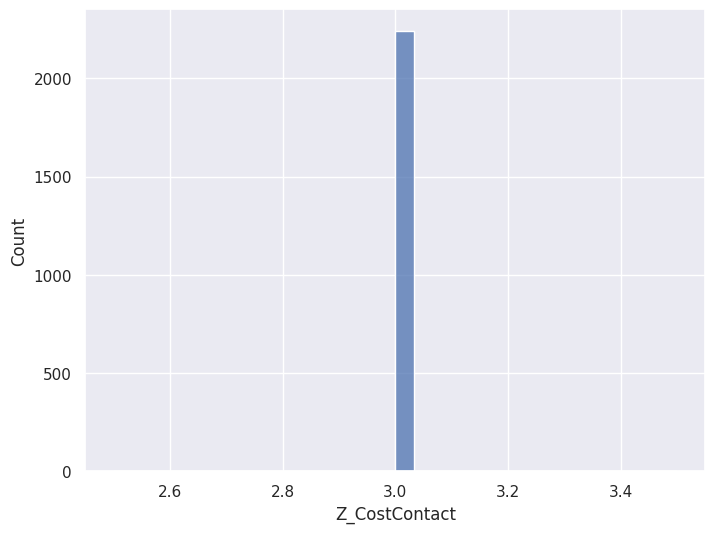

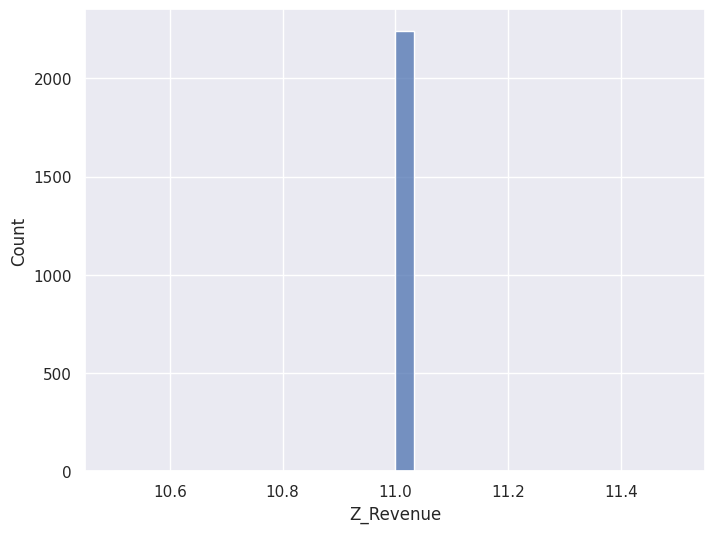

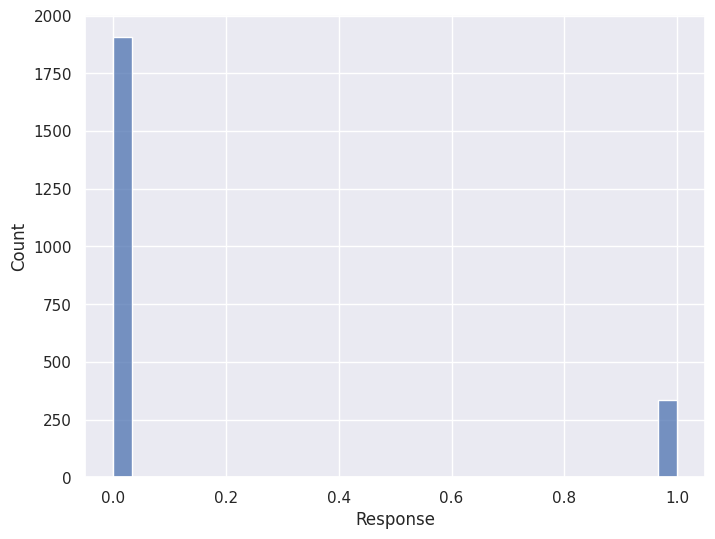

In [ ]:
#Univariate analysis for numerical columns (through histograms)

#Extracting the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Analysis

##Q5 - Identifying the percentage of missing values in each attribute

In [ ]:
# Calculate and print the percentage of missing values for each attribute
print("Percentage of missing values in each attribute:")
count = 0
for column in df.columns:
    missing_percentage = (df[column].isnull().sum() / len(df)) * 100
    print(f"{column}: {missing_percentage:.2f}%" ,end='                                                         ')
    count += 1
    if count % 2 == 0:
        print() # Move to the next line after printing four attributes

Percentage of missing values in each attribute:
ID: 0.00%                                                         Year_Birth: 0.00%                                                         
Education: 0.00%                                                         Marital_Status: 0.00%                                                         
Income: 1.07%                                                         Kidhome: 0.00%                                                         
Teenhome: 0.00%                                                         Dt_Customer: 0.00%                                                         
Recency: 0.00%                                                         MntWines: 0.00%                                                         
MntFruits: 0.00%                                                         MntMeatProducts: 0.00%                                                         
MntFishProducts: 0.00%                                                  

##Q6 - Identifying the count of redundant instances.

In [ ]:
# Counting the number of duplicated instances in the DataFrame
duplicates = df.duplicated().sum()

print("Count of duplicated instances: ", duplicates)

Count of duplicated instances:  0


##Q7- Identifying the columns that have outliers

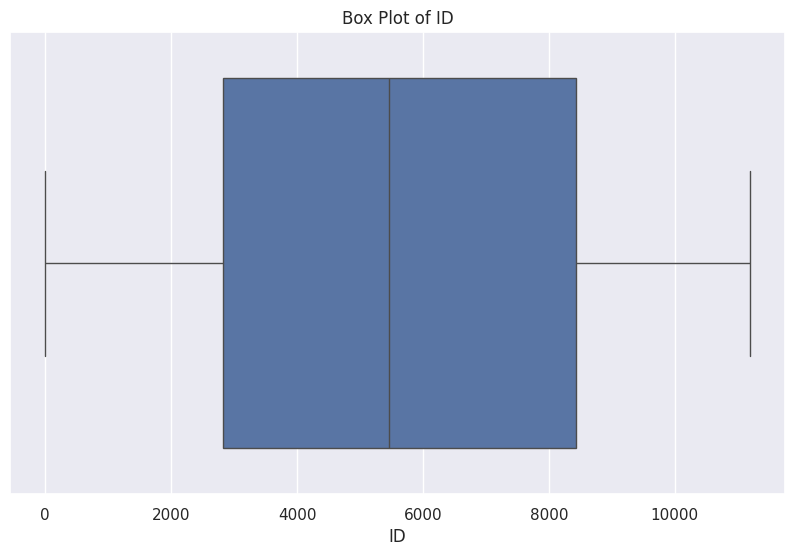

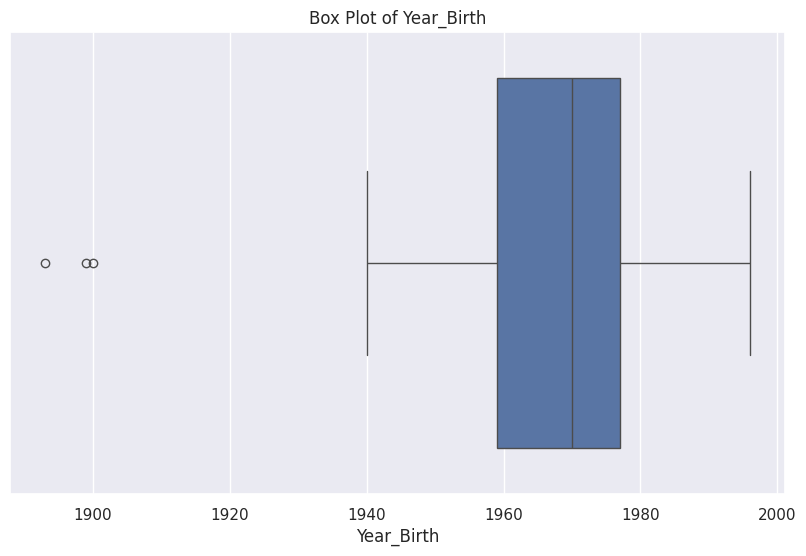

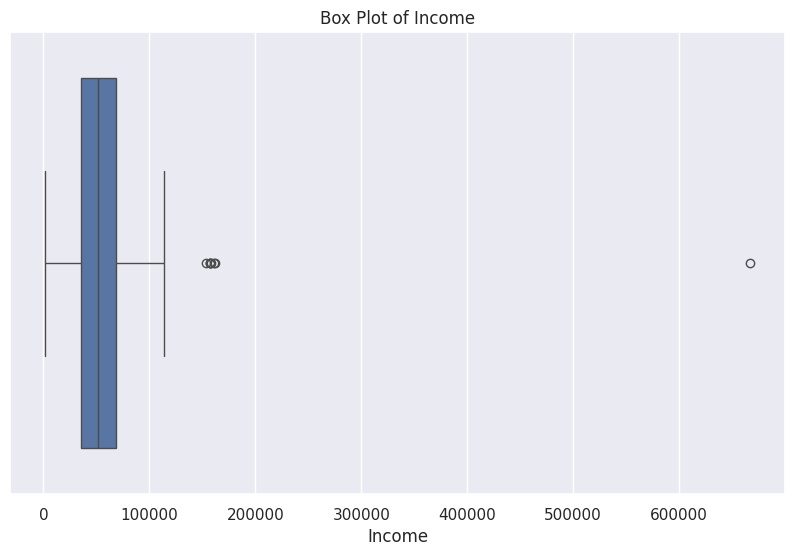

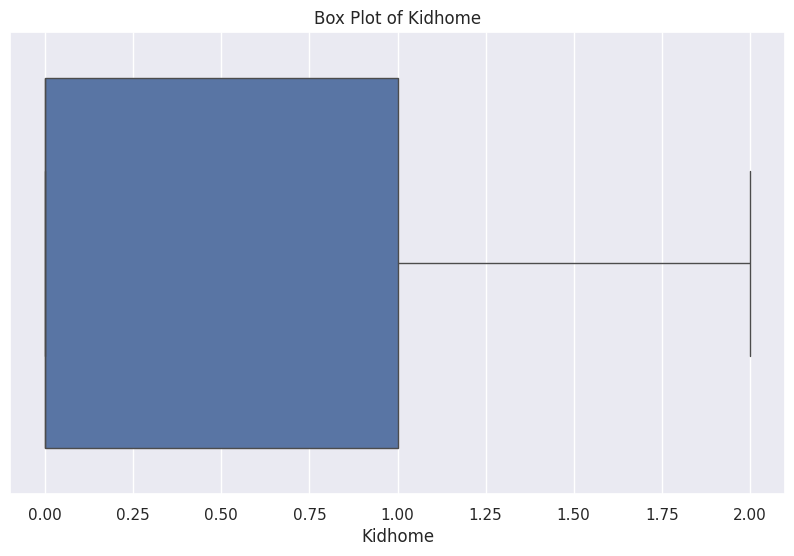

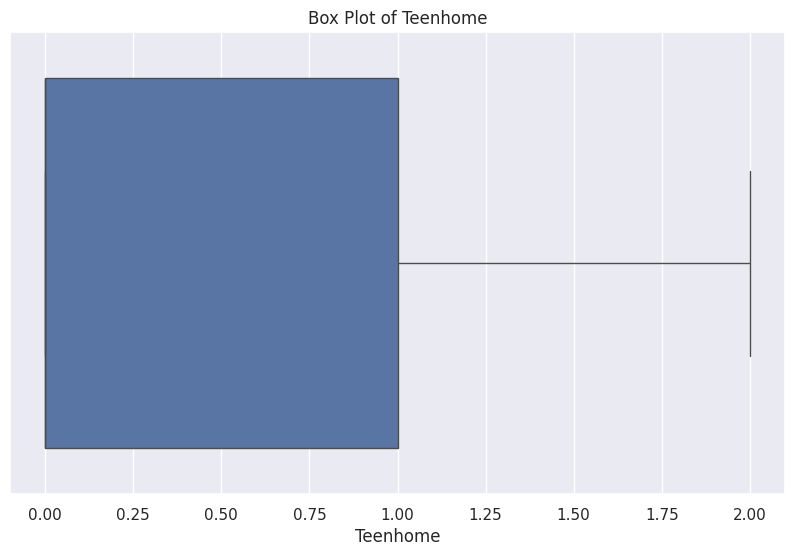

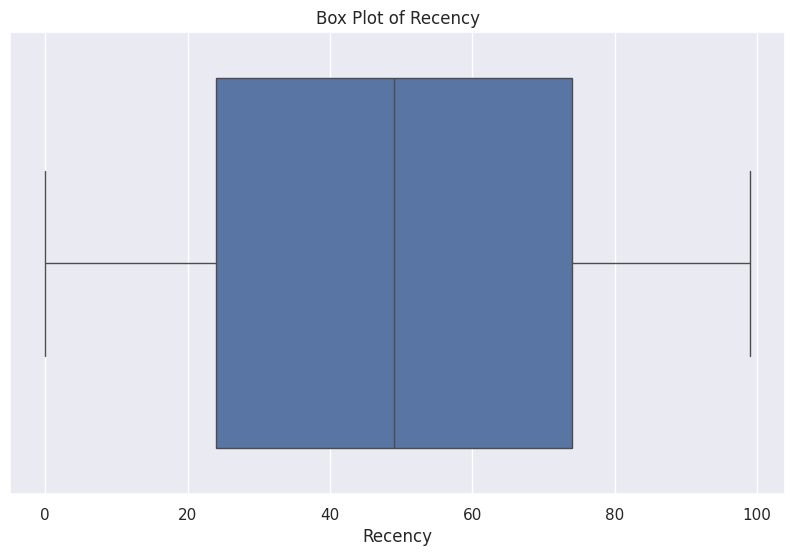

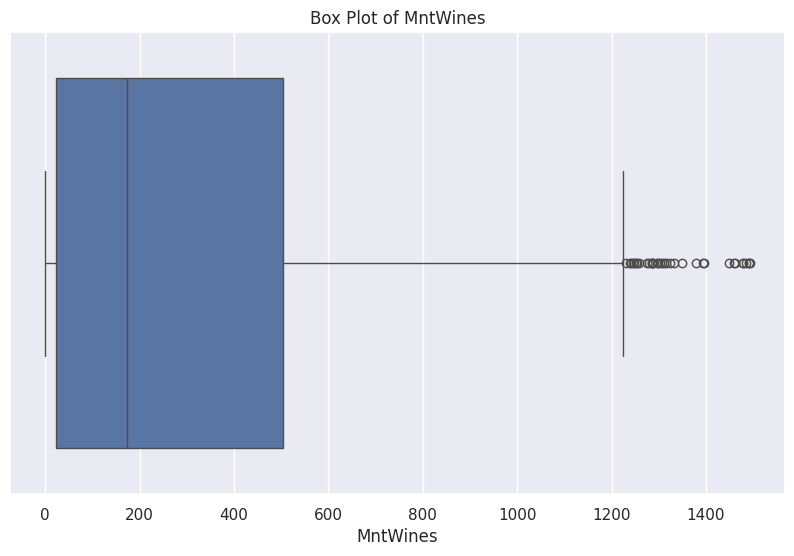

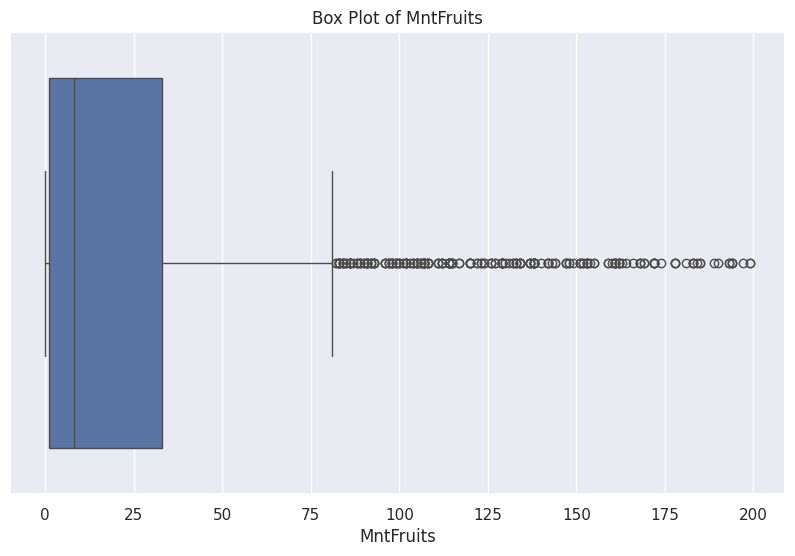

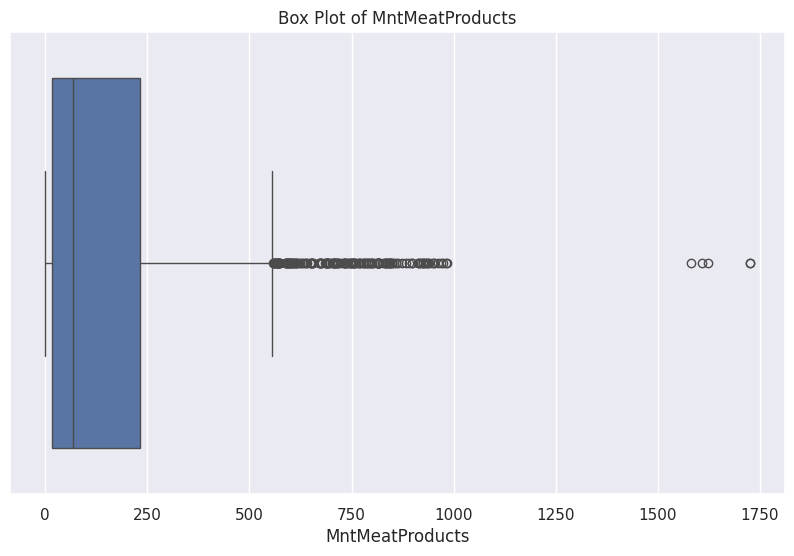

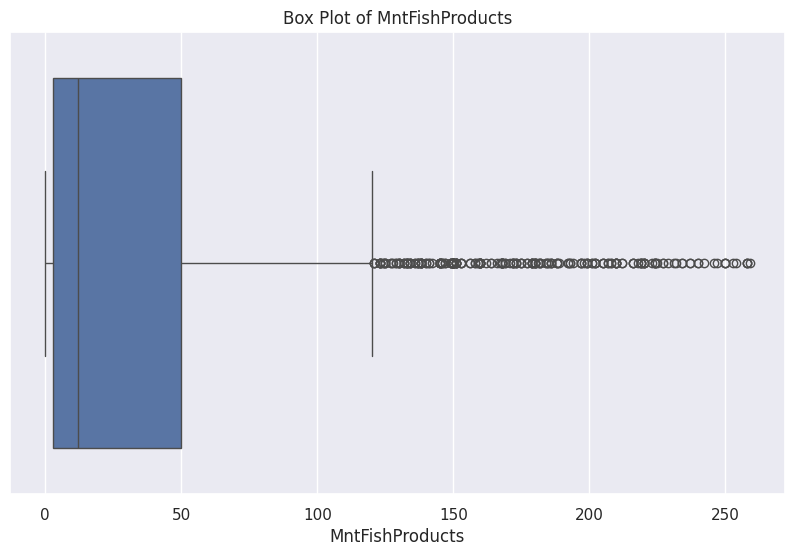

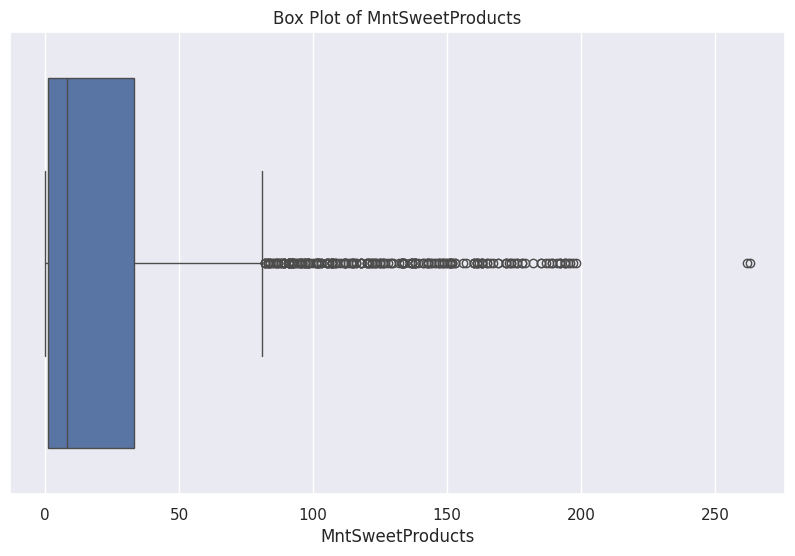

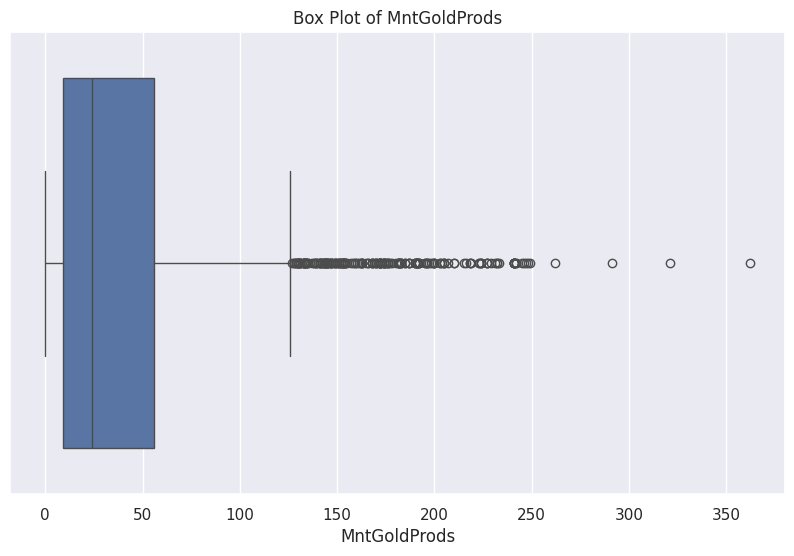

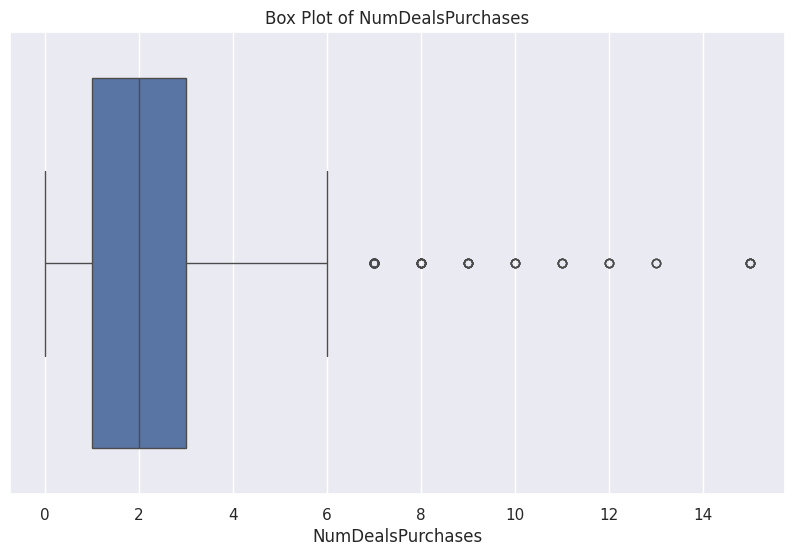

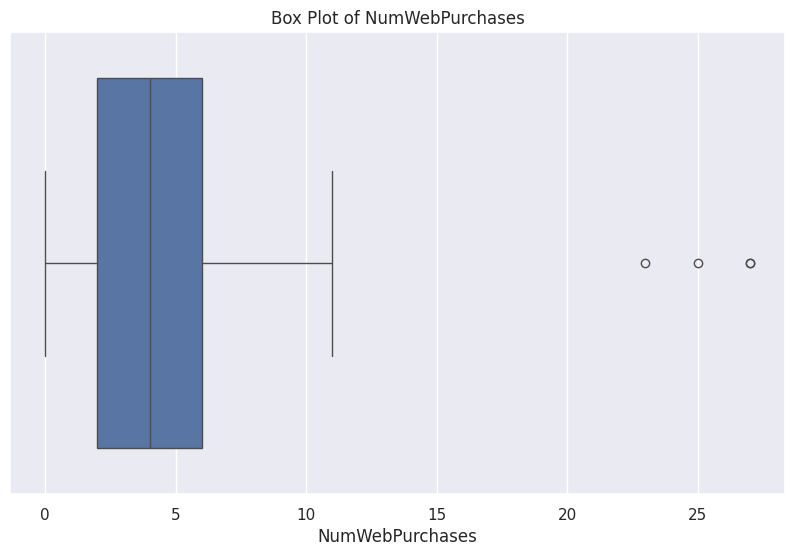

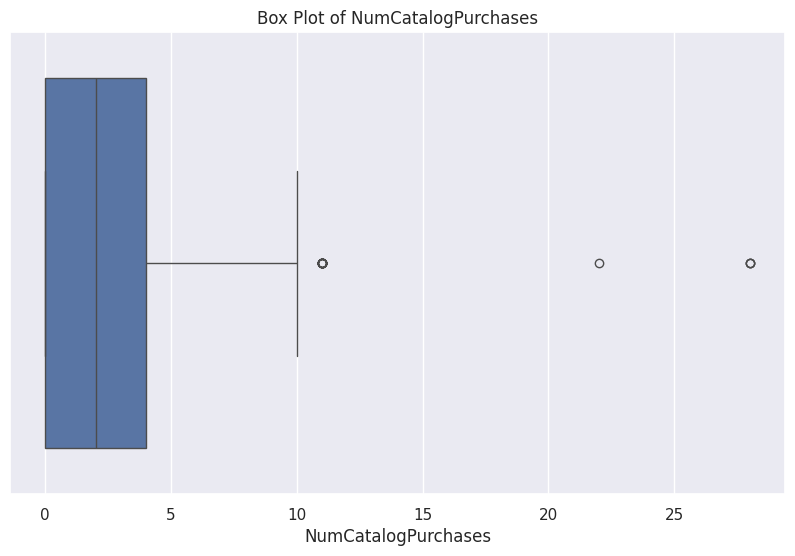

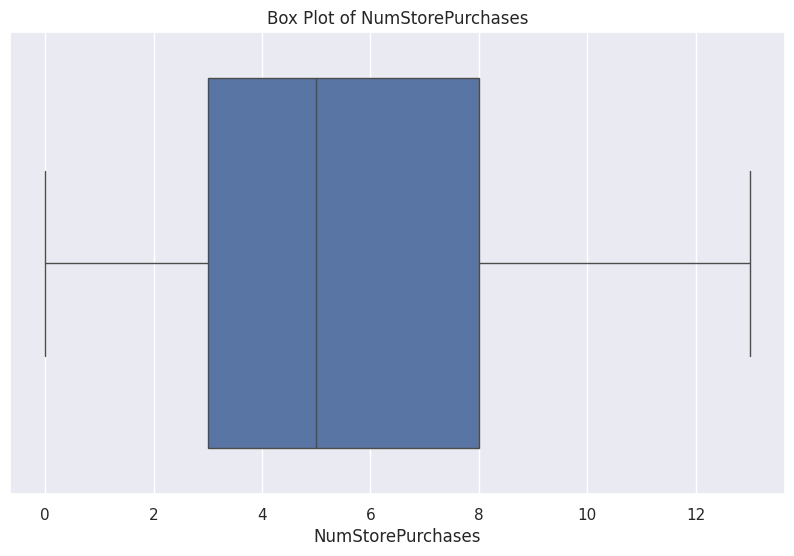

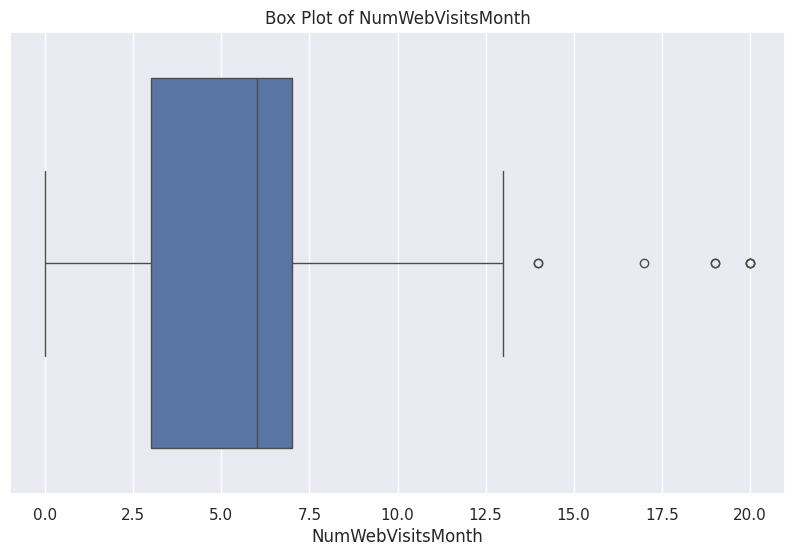

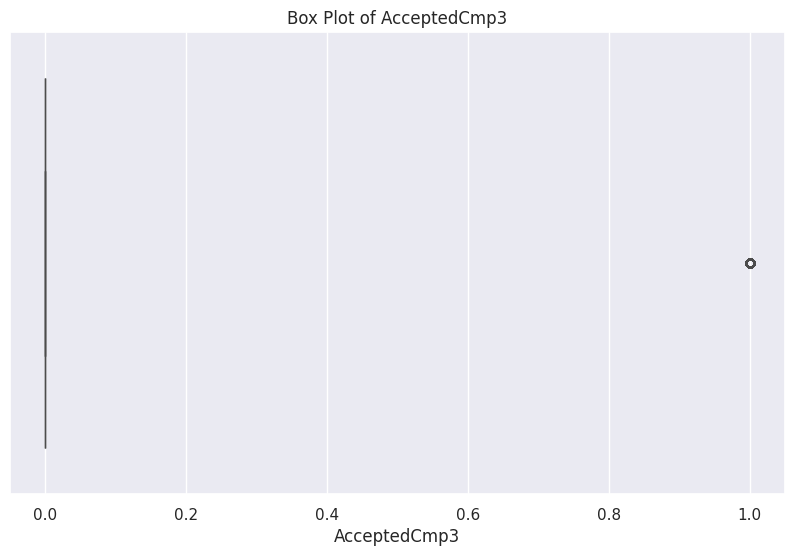

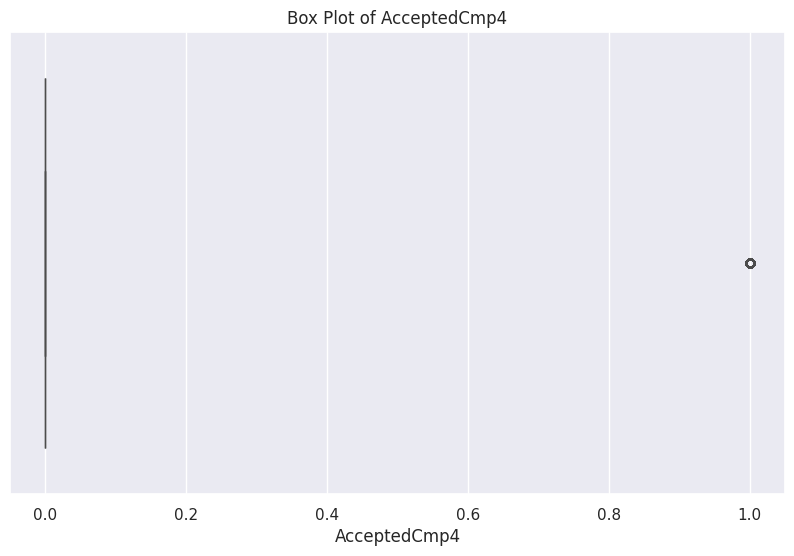

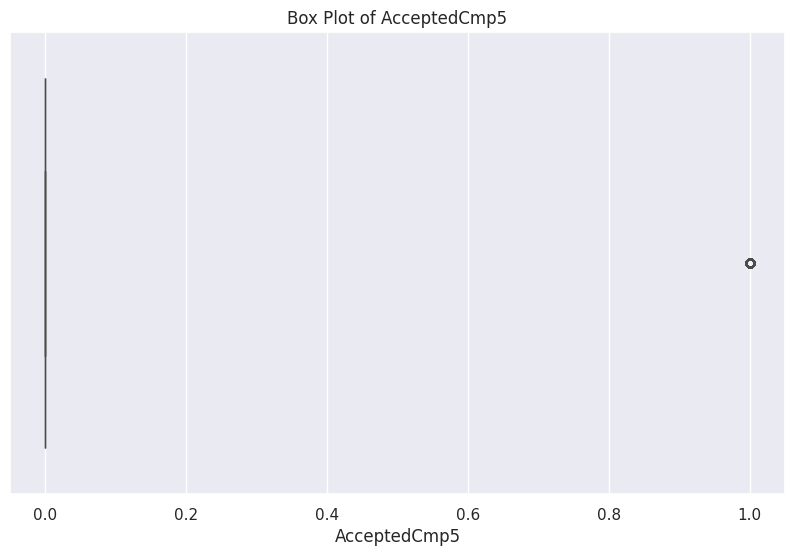

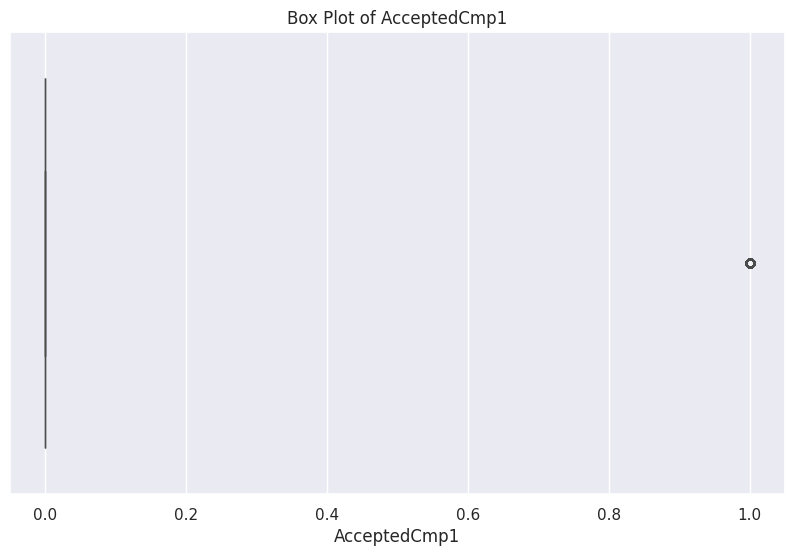

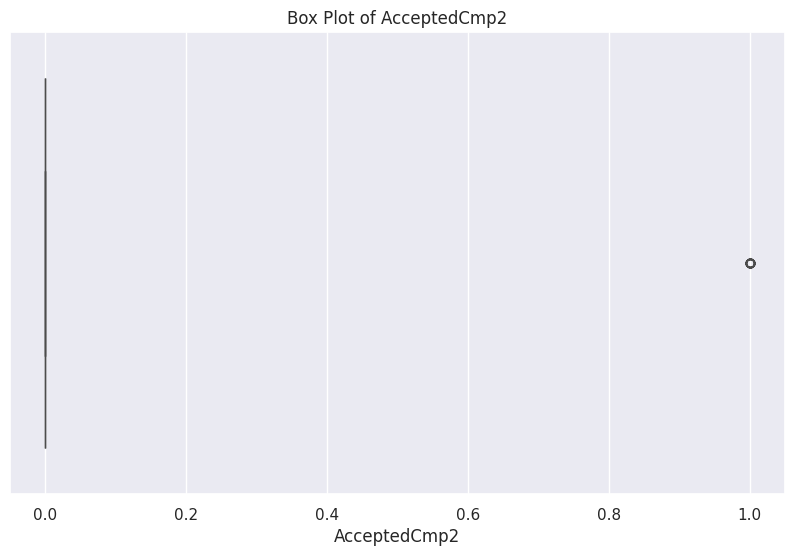

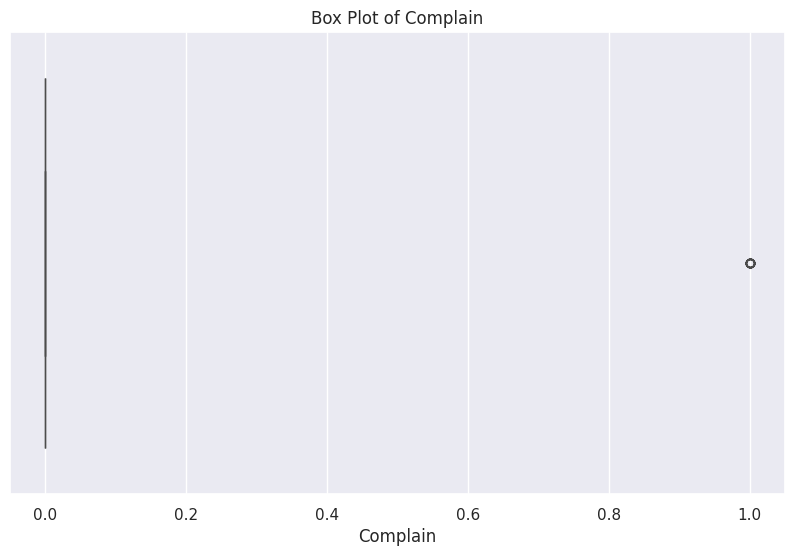

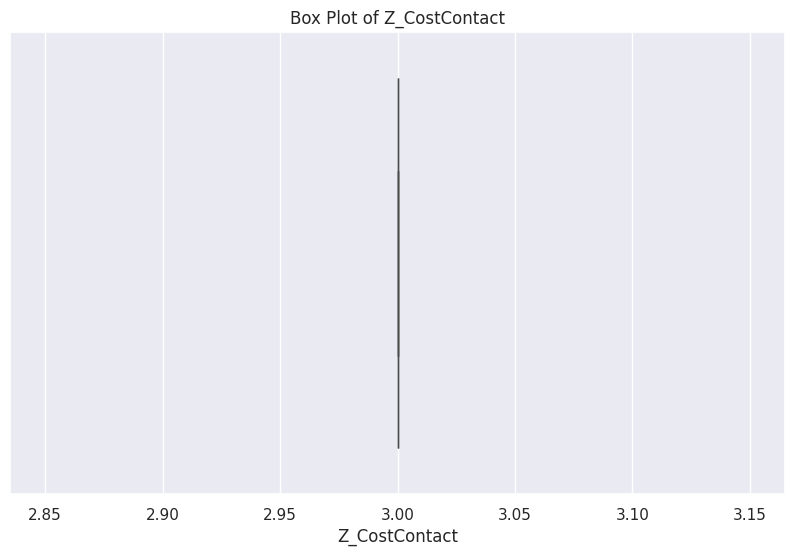

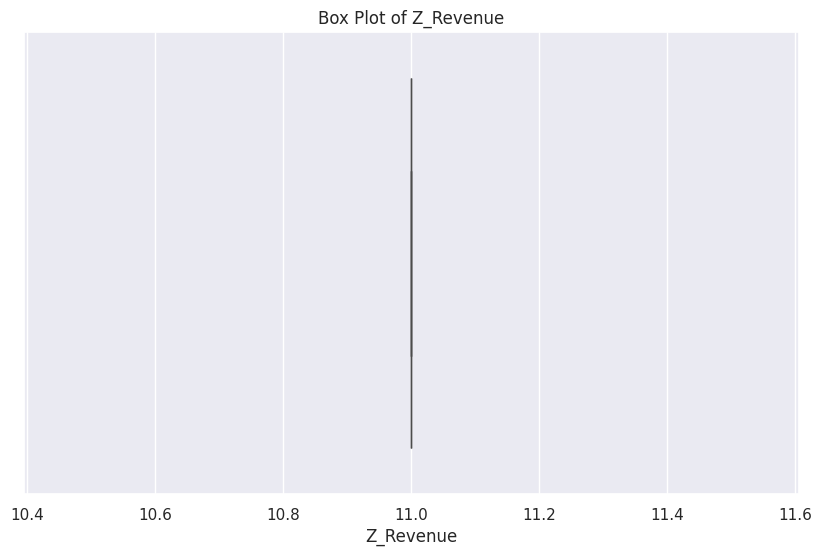

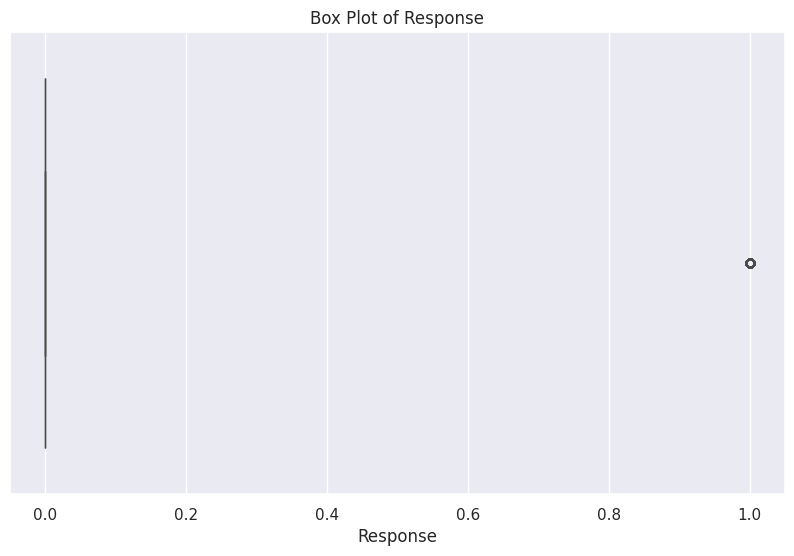

In [ ]:
quantitative_columns = [
    'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response']

#By visualizing the columns, we get a better idea of the number of columns with outliers, in our case we have
for column in quantitative_columns: #using loops for efficiency

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=column,)
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)
        plt.show()

##Q8 - Handle missing values & redundant instances

In [ ]:
#The only column with missing values is the income column, with 24 missing values

# Print the count of missing values for each column
print("Count of missing values per column:")
for column in df.columns:
    missing_values_count = df[column].isnull().sum()
    print(f"{column}: {missing_values_count}")

Count of missing values per column:
ID: 0
Year_Birth: 0
Education: 0
Marital_Status: 0
Income: 24
Kidhome: 0
Teenhome: 0
Dt_Customer: 0
Recency: 0
MntWines: 0
MntFruits: 0
MntMeatProducts: 0
MntFishProducts: 0
MntSweetProducts: 0
MntGoldProds: 0
NumDealsPurchases: 0
NumWebPurchases: 0
NumCatalogPurchases: 0
NumStorePurchases: 0
NumWebVisitsMonth: 0
AcceptedCmp3: 0
AcceptedCmp4: 0
AcceptedCmp5: 0
AcceptedCmp1: 0
AcceptedCmp2: 0
Complain: 0
Z_CostContact: 0
Z_Revenue: 0
Response: 0


In [ ]:
quantitative_attributes = df.select_dtypes(include=['int64', 'float64']).columns

for col in quantitative_attributes:
    df[col].fillna(df[col].median(), inplace=True)

# Print only the columns with missing values
print("Columns with missing values:")
count = 0
for column in df.columns:
    missing_values_count = df[column].isnull().sum()
    if missing_values_count > 0:
        count += 1
        print(f"{column}: {missing_values_count:.2f}")
print(count)

Columns with missing values:
0


In [ ]:
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88  

##Q9 - Label encode categorical data

In [ ]:
# List of categorical columns to label encode
df['Marital_Status'].unique()
df['Education'].unique()
categorical_columns = ['Education', 'Marital_Status']

# Apply Label Encoding to the categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
#male 1, female 0

print(df.shape)
df.head(20)


#test_data.head()

(2240, 29)


ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957          2               4  58138.0        0         0   
1   2174        1954          2               4  46344.0        1         1   
2   4141        1965          2               5  71613.0        0         0   
3   6182        1984          2               5  26646.0        1         0   
4   5324        1981          4               3  58293.0        1         0   
5   7446        1967          3               5  62513.0        0         1   
6    965        1971          2               2  55635.0        0         1   
7   6177        1985          4               3  33454.0        1         0   
8   4855        1974          4               5  30351.0        1         0   
9   5899        1950          4               5   5648.0        1         1   
10  1994        1983          2               3  51381.5        1         0   
11   387        1976          1               3   7500.0        0         0   
12  2125        1959          2               2  63033.0        0         0   
13  8180        1952          3               2  59354.0        1         1   
14  2569        1987          2               3  17323.0        0         0   
15  2114        1946          4               4  82800.0        0         0   
16  9736        1980          2               3  41850.0        1         1   
17  4939        1946          2               5  37760.0        0         0   
18  6565        1949          3               3  76995.0        0         1   
19  2278        1985          0               4  33812.0        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0   04-09-2012       58       635         88              546   
1   08-03-2014       38        11          1                6   
2   21-08-2013       26       426         49              127   
3   10-02-2014       26        11          4               20   
4   19-01-2014       94       173         43              118   
5   09-09-2013       16       520         42               98   
6   13-11-2012       34       235         65              164   
7   08-05-2013       32        76         10               56   
8   06-06-2013       19        14          0               24   
9   13-03-2014       68        28          0                6   
10  15-11-2013       11         5          5                6   
11  13-11-2012       59         6         16               11   
12  15-11-2013       82       194         61              480   
13  15-11-2013       53       233          2               53   
14  10-10-2012       38         3         14               17   
15  24-11-2012       23      1006         22              115   
16  24-12-2012       51        53          5               19   
17  31-08-2012       20        84          5               38   
18  28-03-2013       91      1012         80              498   
19  03-11-2012       86         4         17               19   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               172                88            88                  3   
1                 2                 1             6                  2   
2               111                21            42                  1   
3                10                 3             5                  2   
4                46                27            15                  5   
5                 0                42            14                  2   
6                50                49            27                  4   
7                 3                 1            23                  2   
8                 3                 3             2                  1   
9                 1                 1            13                  1   
10                0                 2             1                  1   
11               11                 1            16                  1   
12              22

In [ ]:
df=df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],axis=1)


##Q10 - Normalize inconsistent data

In [ ]:
quantitative_attributes = df.select_dtypes(include=['int64', 'float64']).columns

for column in quantitative_attributes:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())



##Q11 - Correlation Map

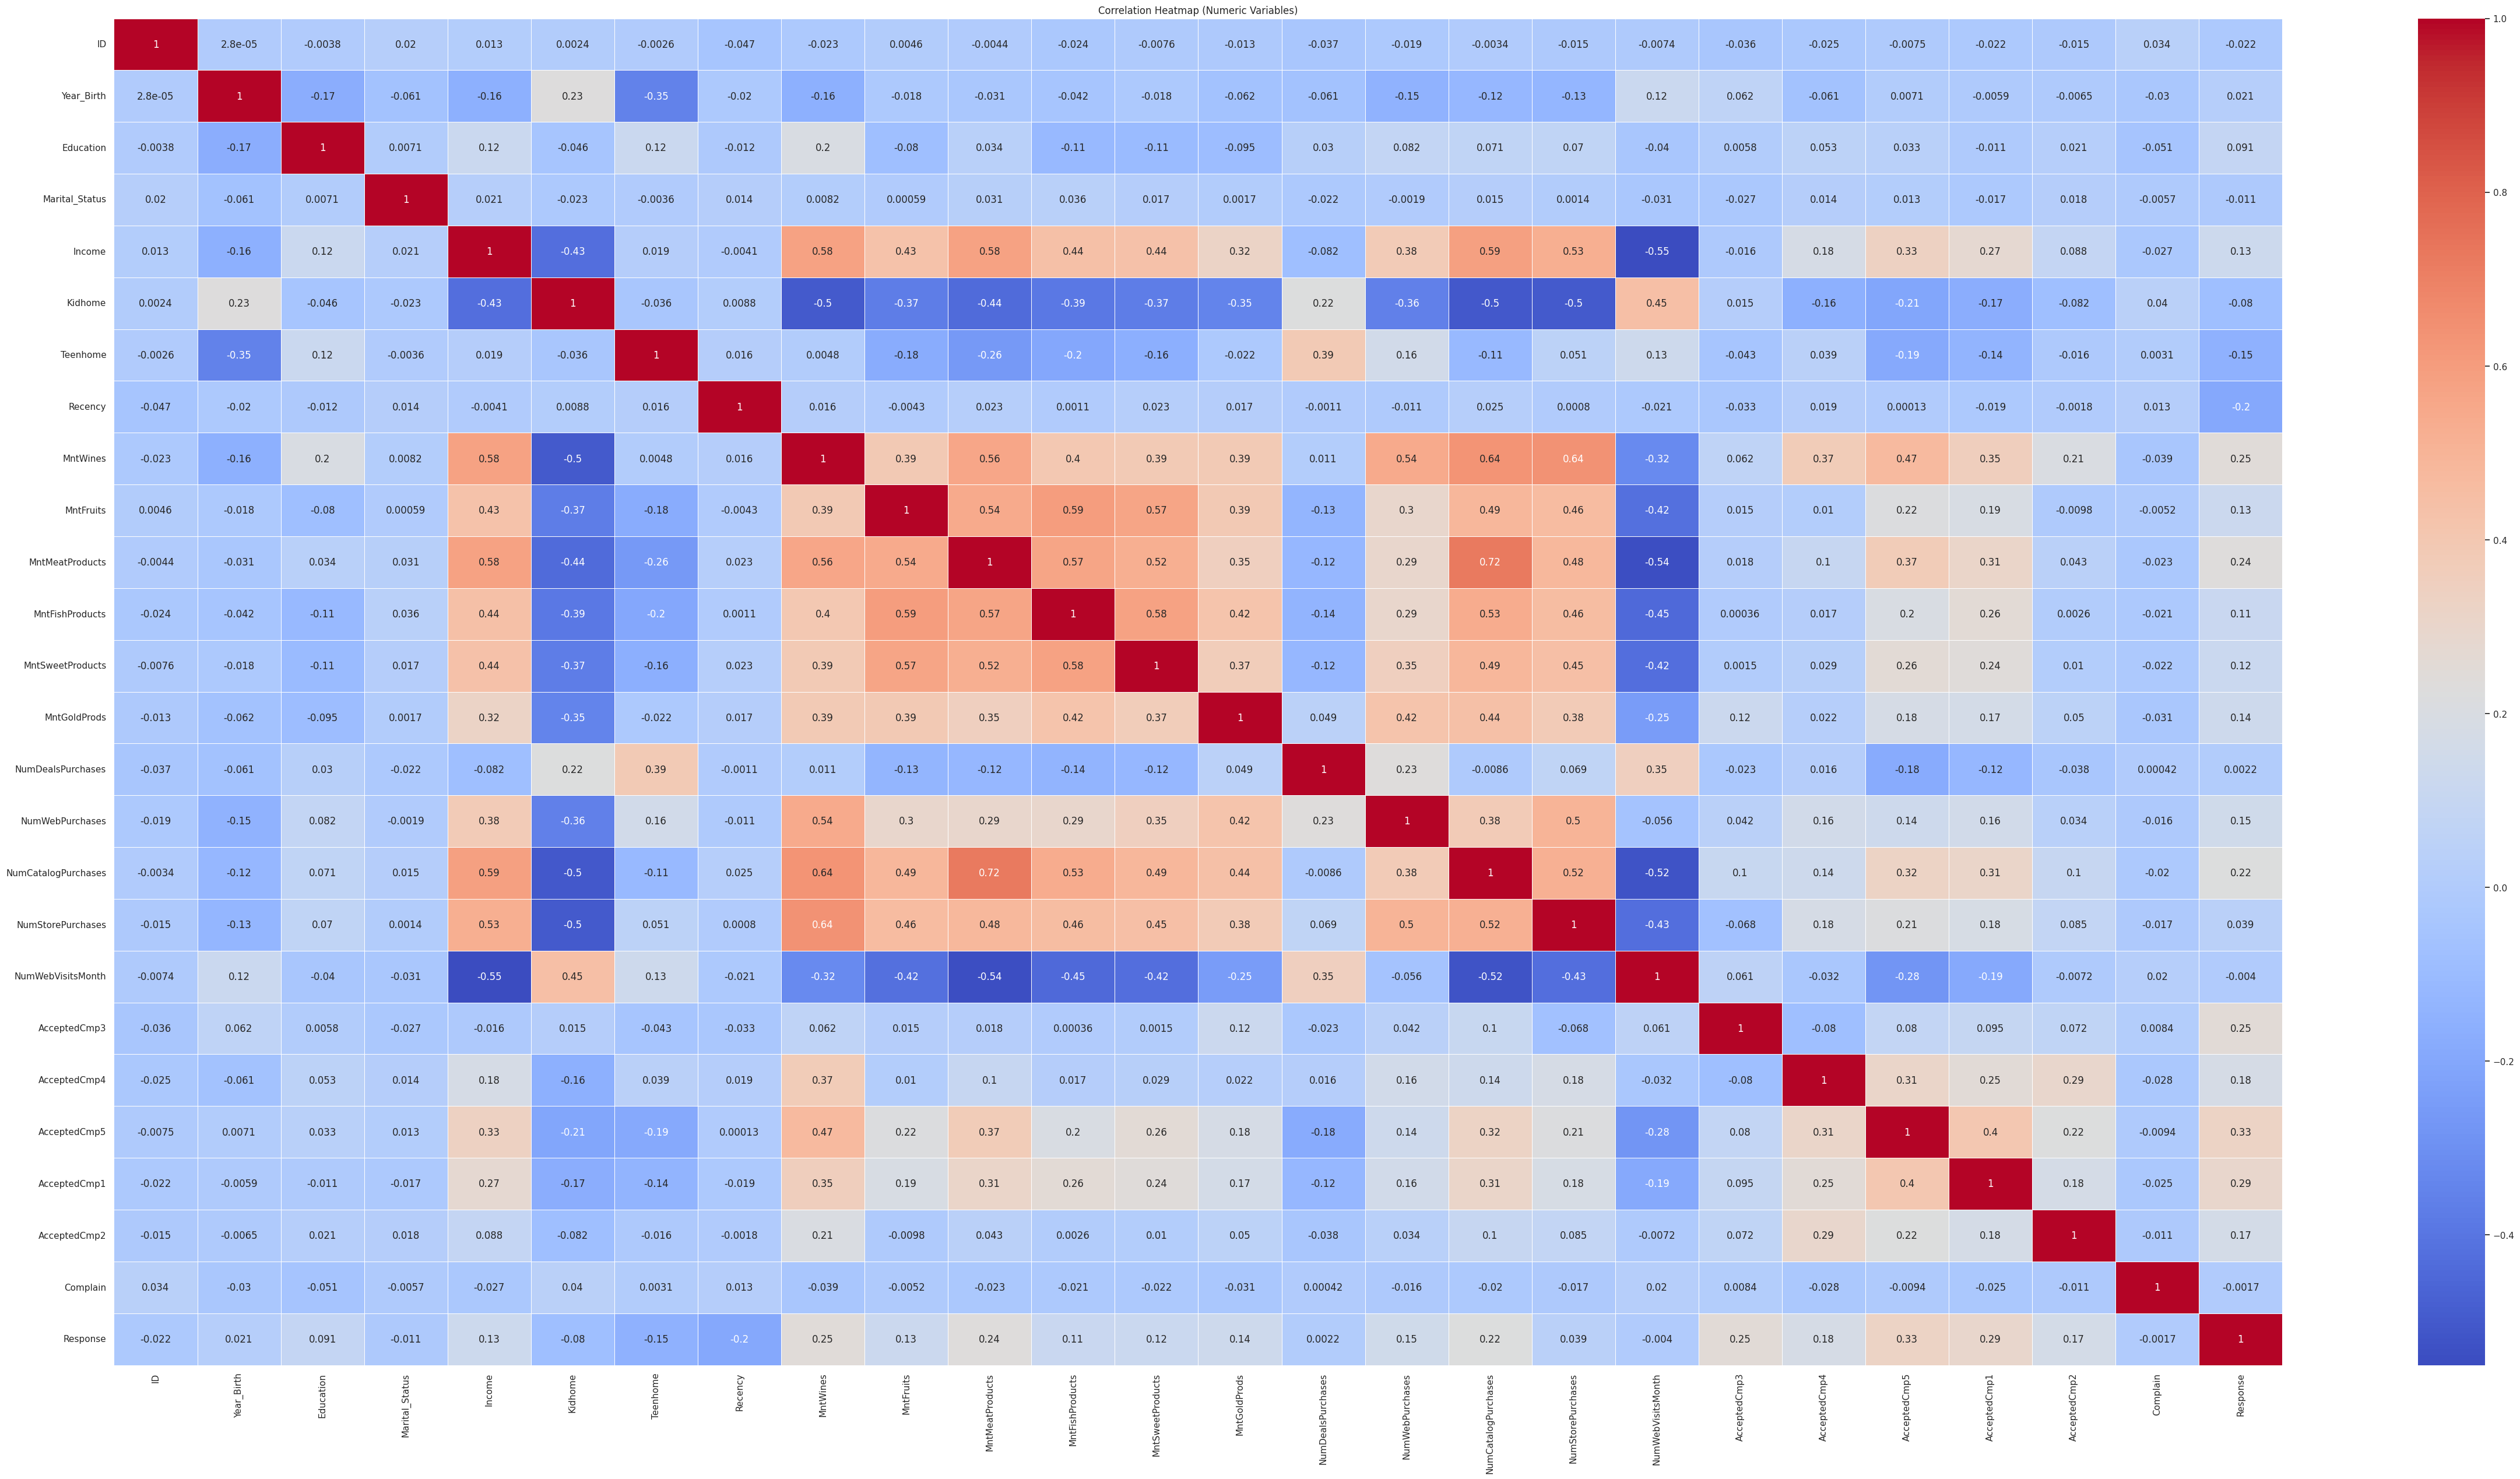

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(60, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()

#Hierarchical Clustering Algorithm

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
sns.set(color_codes=True)

##MNTFruits - MNTSweetProducts

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


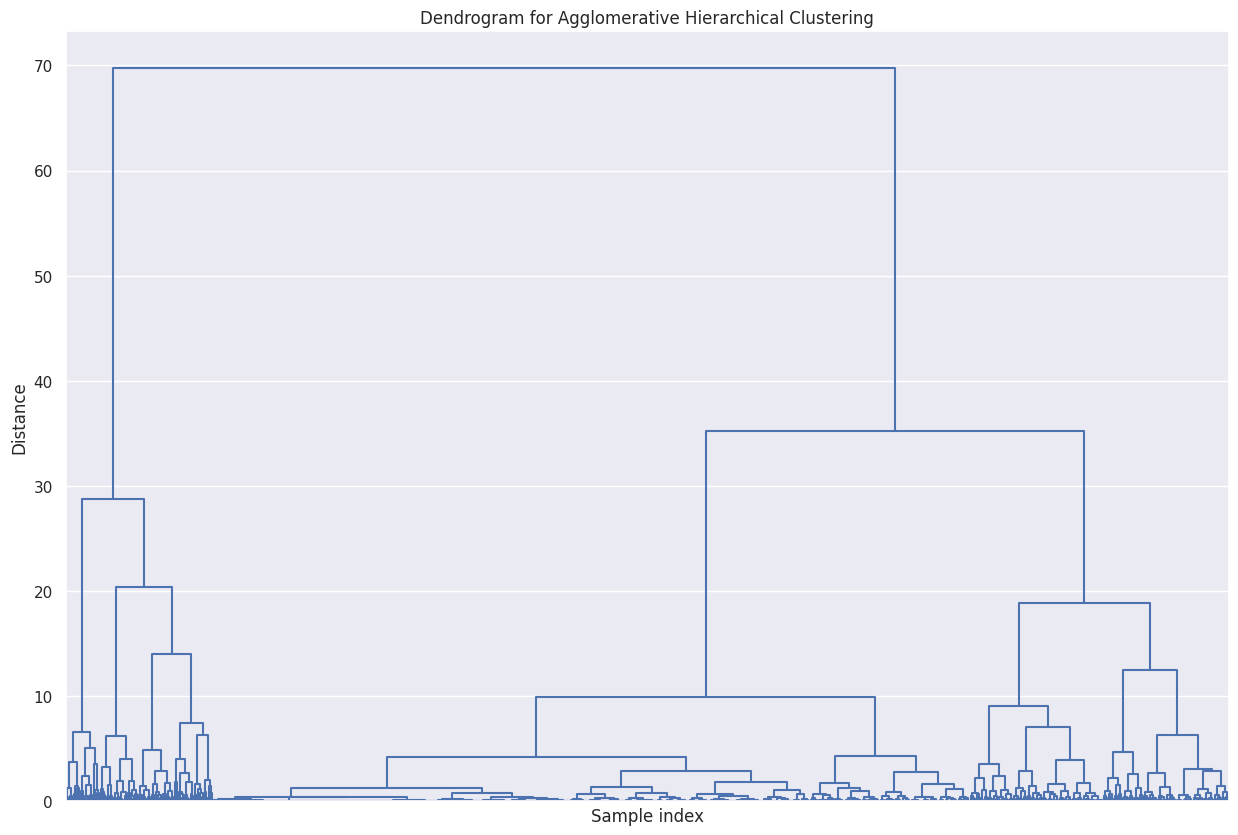

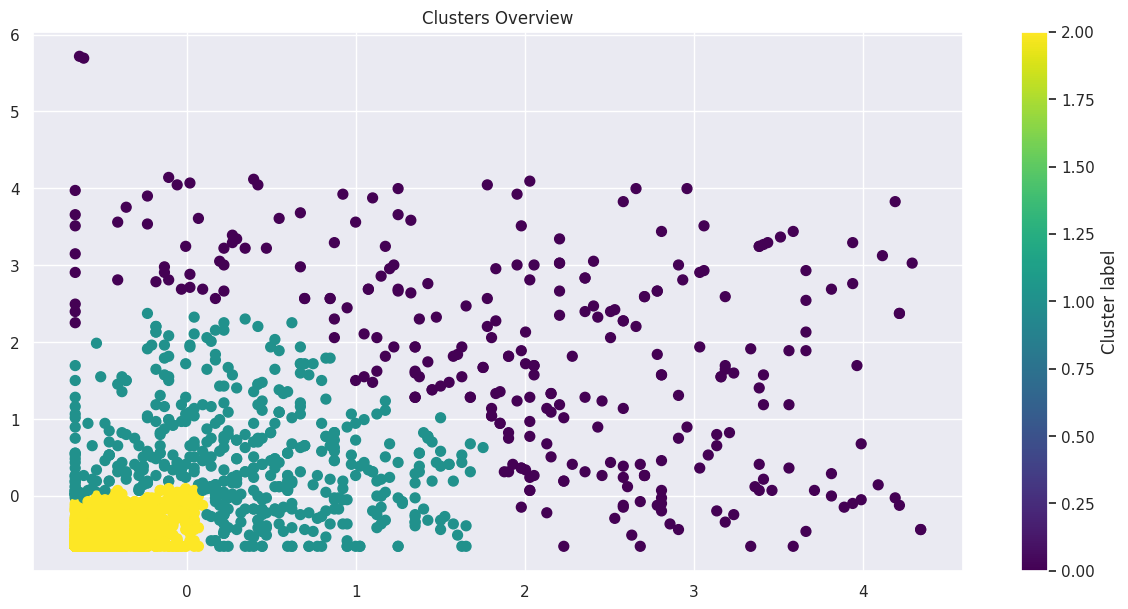

Silhouette Score: 0.5749631425365257


In [ ]:
features = ['MntFruits', 'MntSweetProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


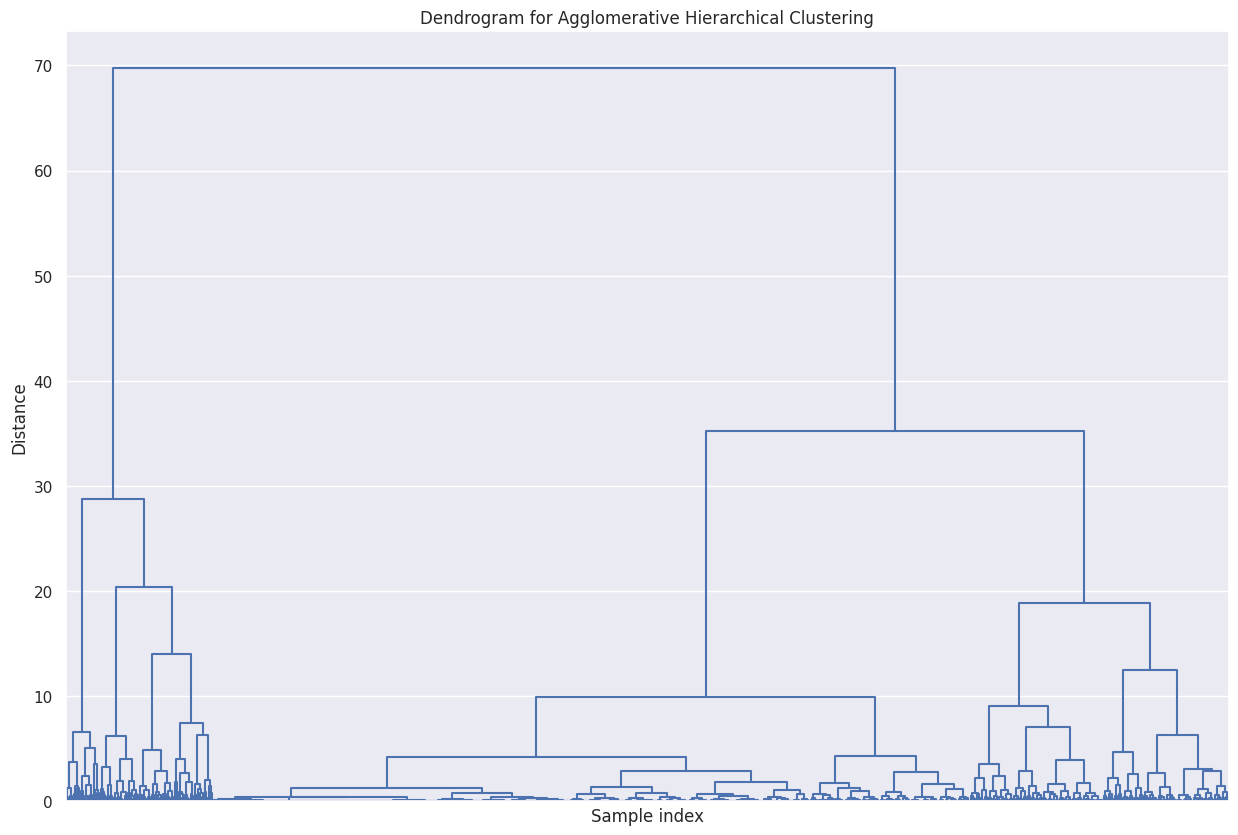

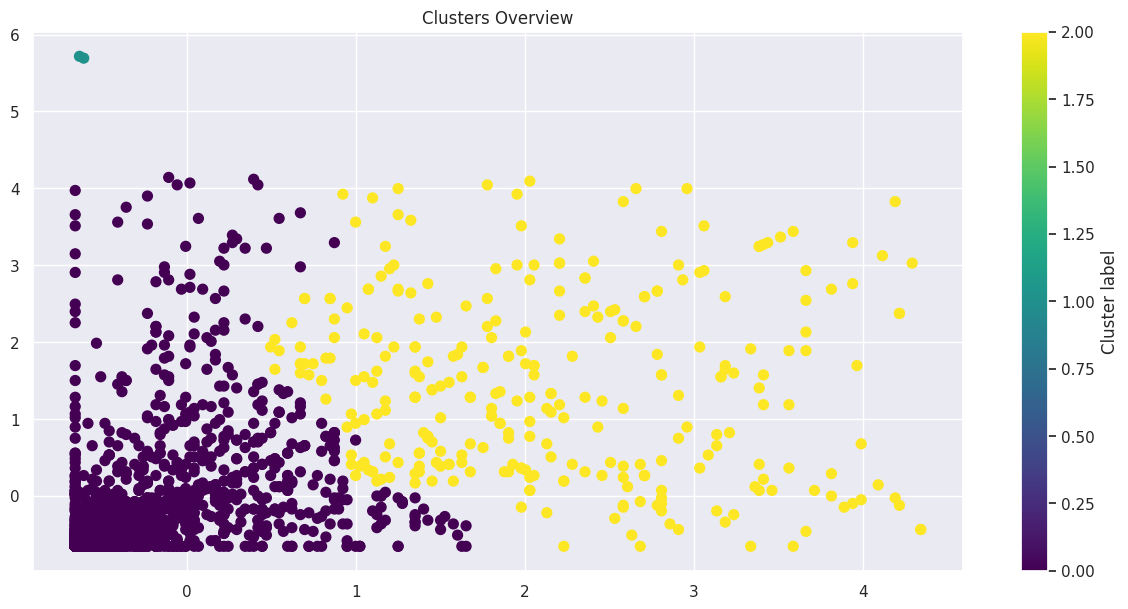

Silhouette Score: 0.6713573189568779


In [ ]:
features = ['MntFruits', 'MntSweetProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


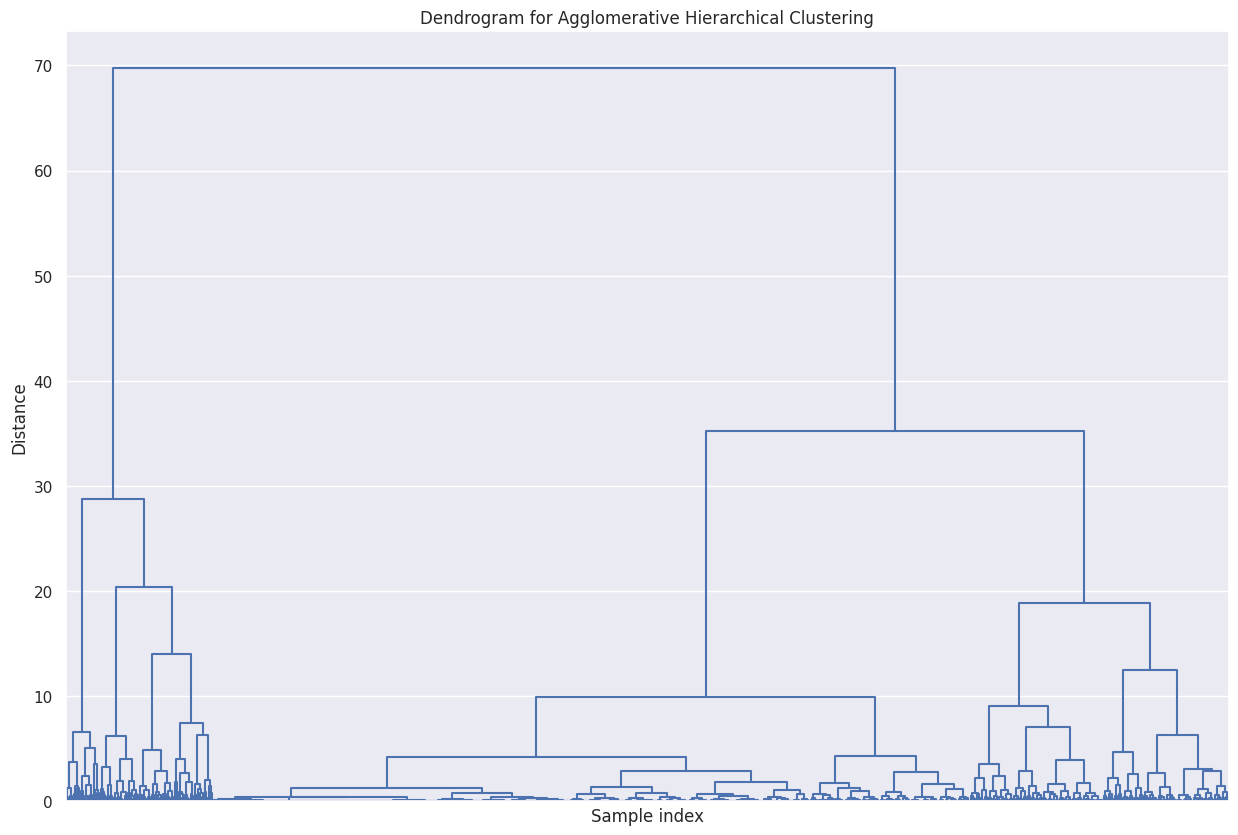

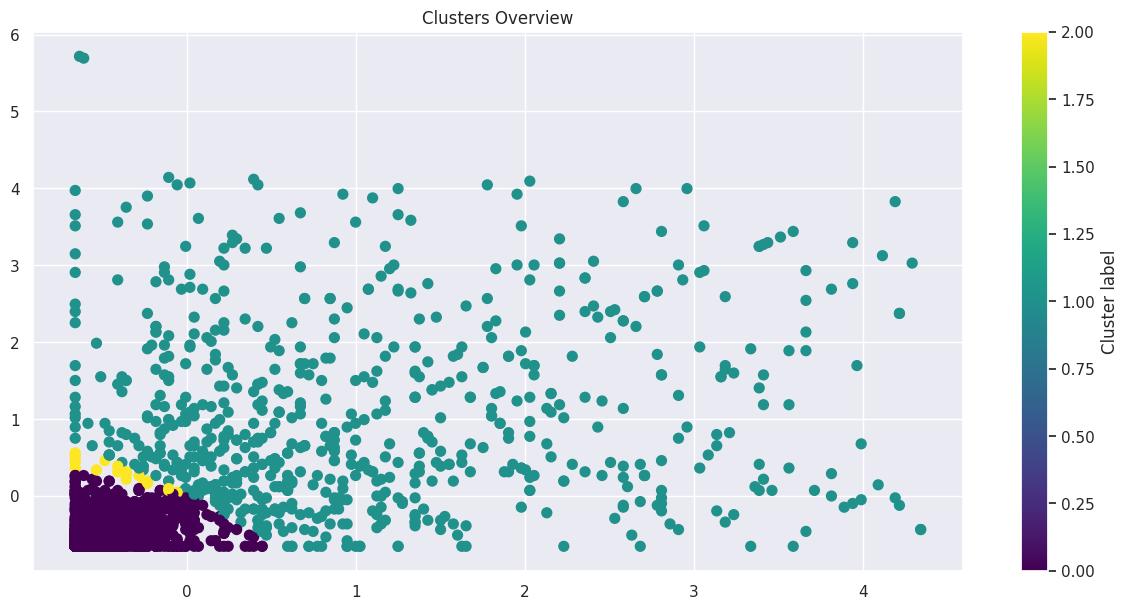

Silhouette Score: 0.37921324303161613


In [ ]:
features = ['MntFruits', 'MntSweetProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

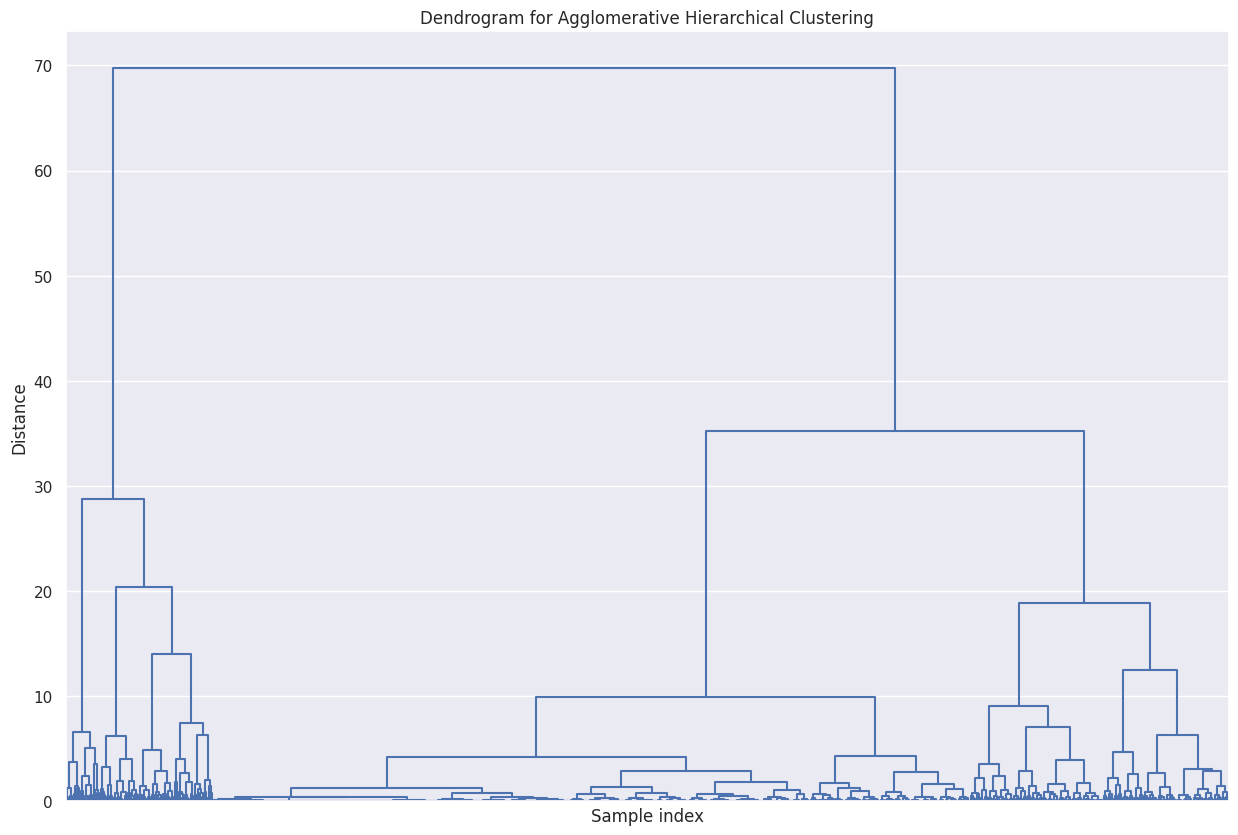

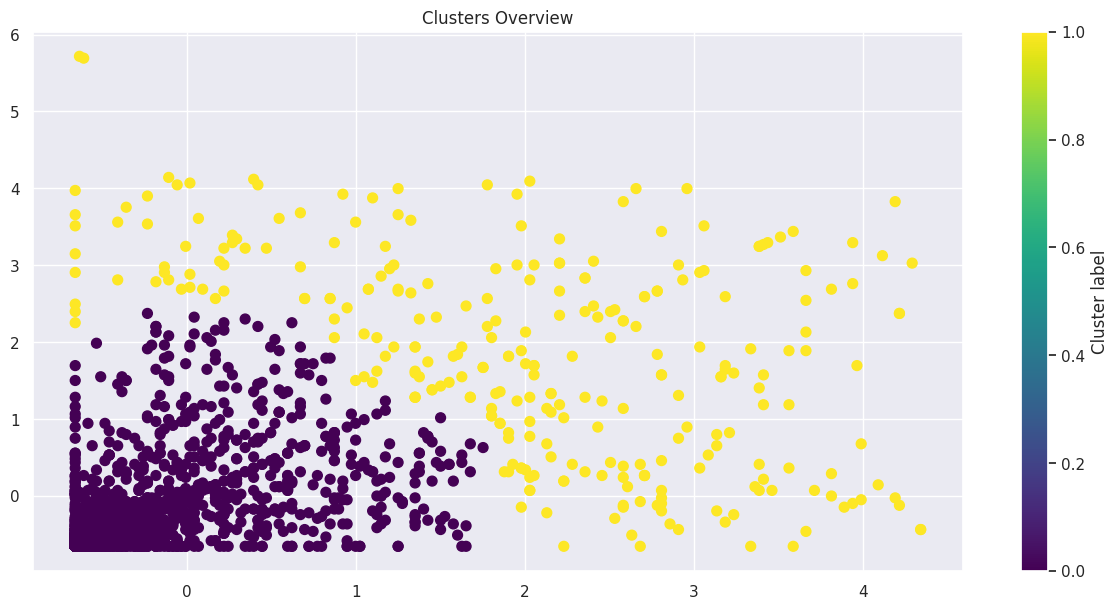

Silhouette Score: 0.6998292932865026


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

features = ['MntFruits', 'MntSweetProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering()
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

##MNTMeatProducts - MNTFishProducts

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


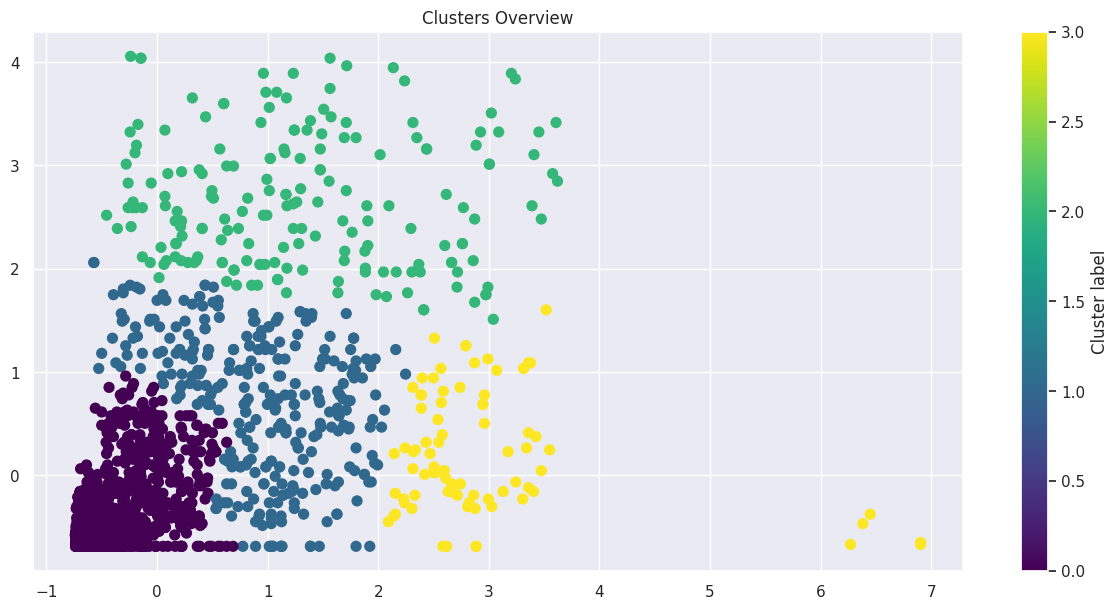

Silhouette Score: 0.6210559929823253


In [ ]:
features = ['MntMeatProducts', 'MntFishProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


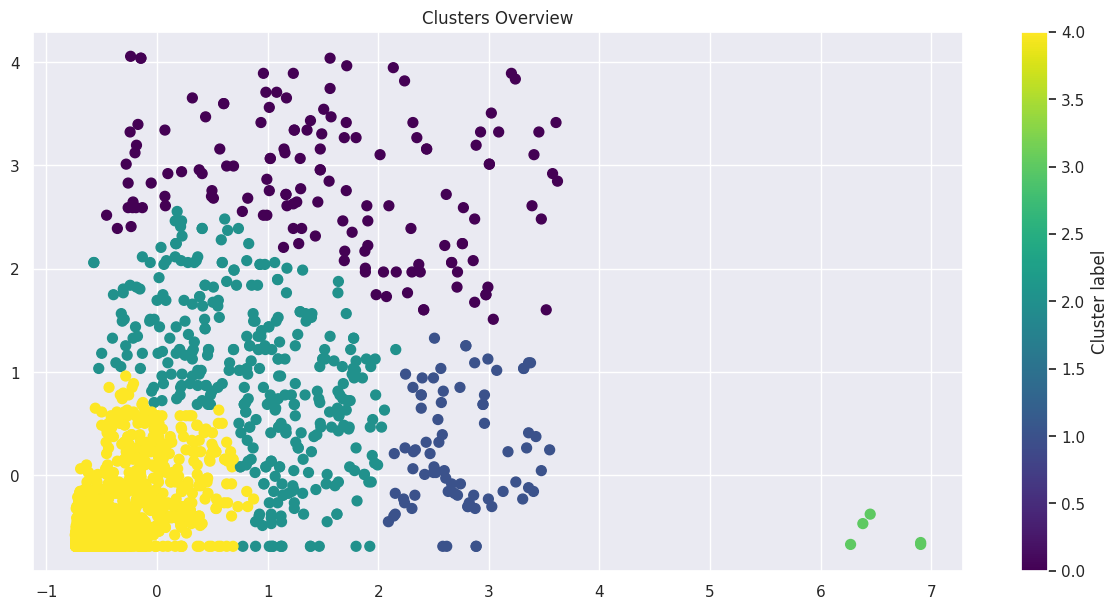

Silhouette Score: 0.6251411559499914


In [ ]:

features = ['MntMeatProducts', 'MntFishProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


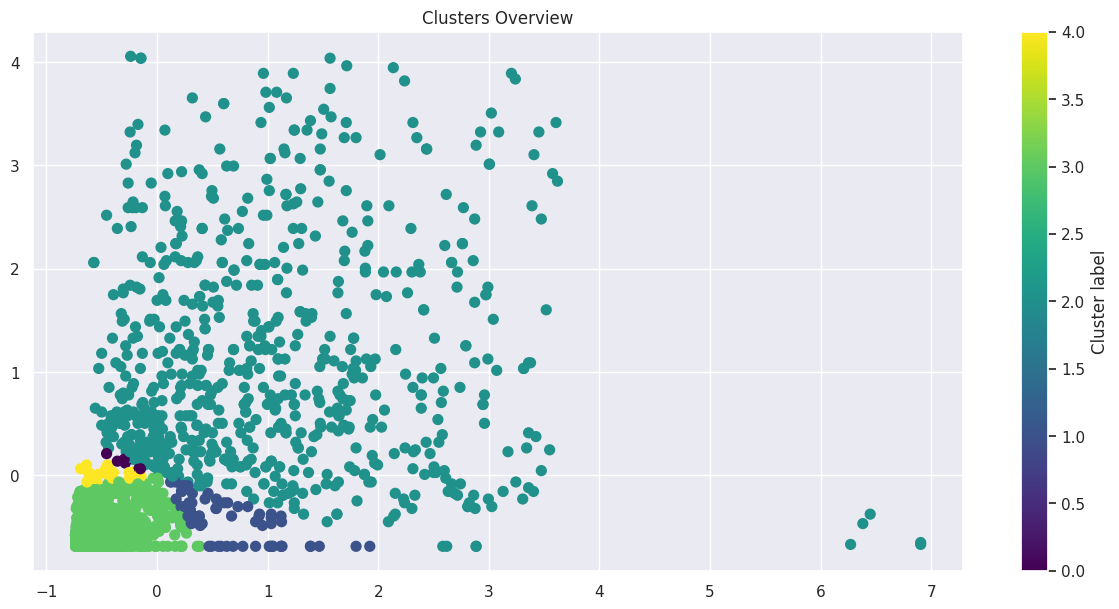

Silhouette Score: 0.2813511244850602


In [ ]:
features = ['MntMeatProducts', 'MntFishProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='single')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

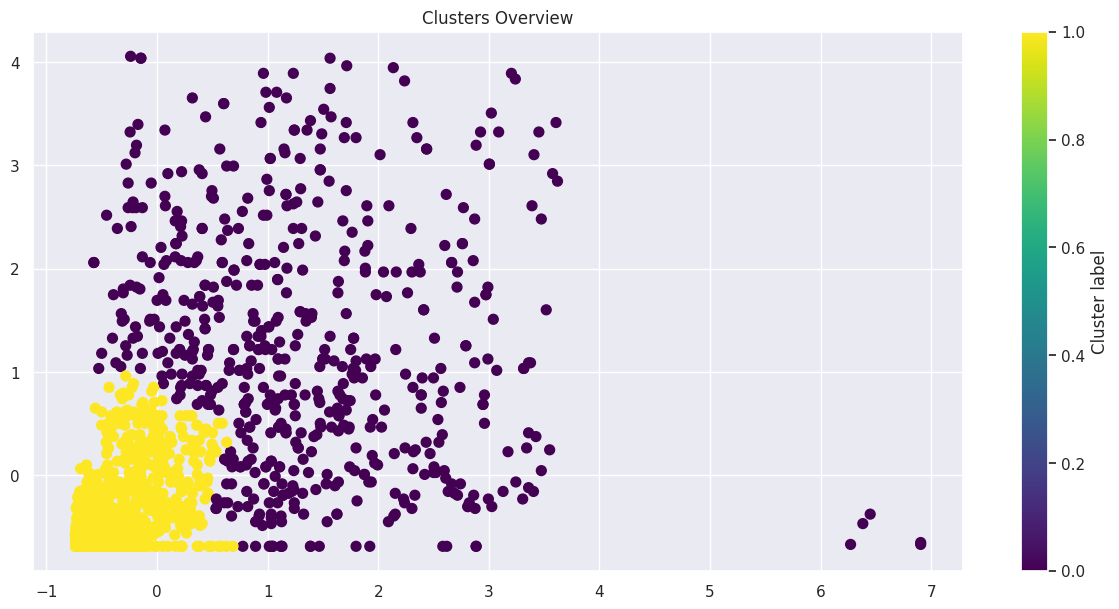

Silhouette Score: 0.6606039071305213


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
#'NumWebPurchases',
# Data preparation
features = ['MntMeatProducts', 'MntFishProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering()
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

##MNTFishProducts - MNTSweetProducts

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


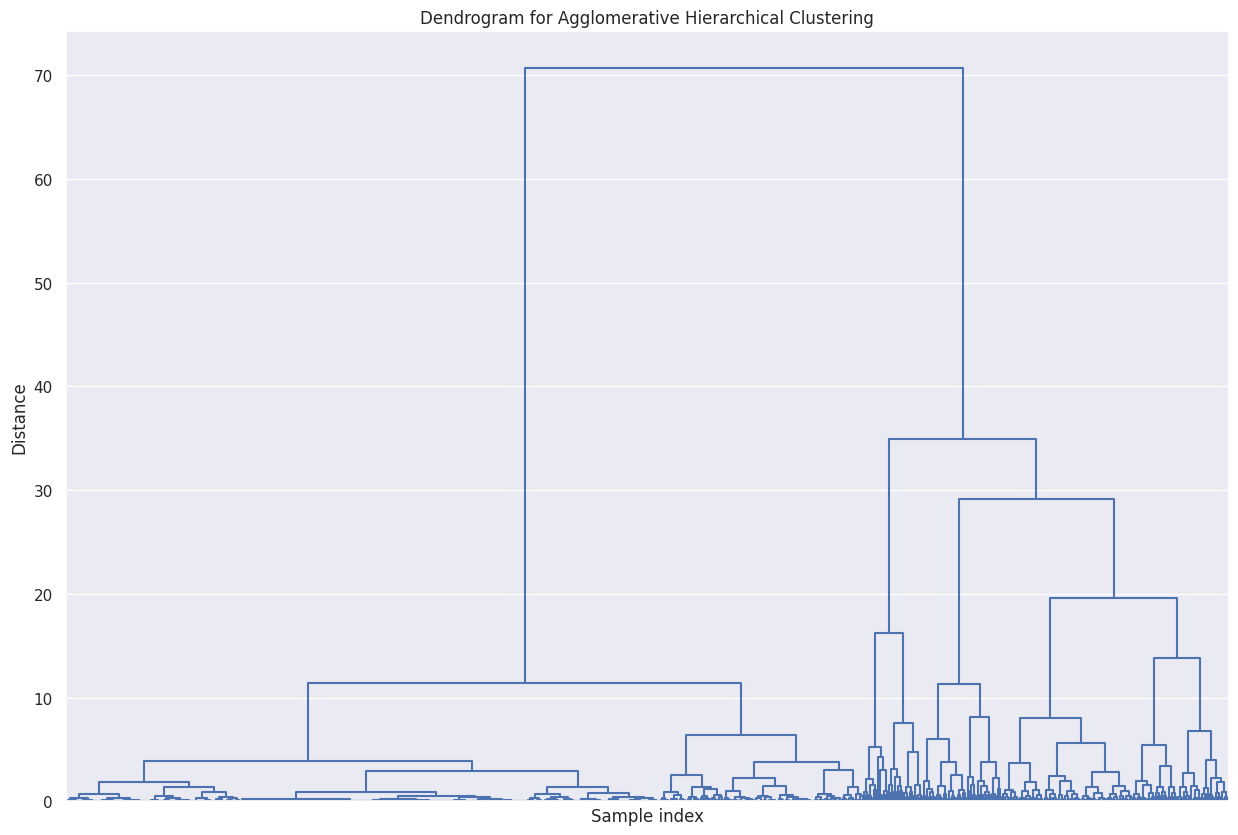

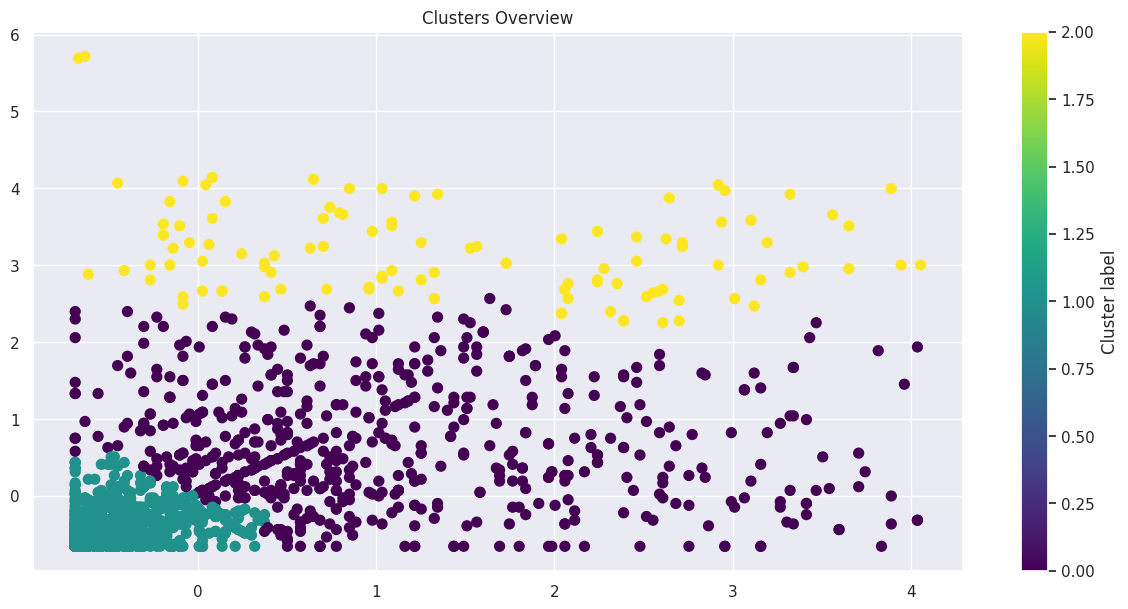

Silhouette Score: 0.6256456411191085


In [ ]:
features = ['MntFishProducts', 'MntSweetProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


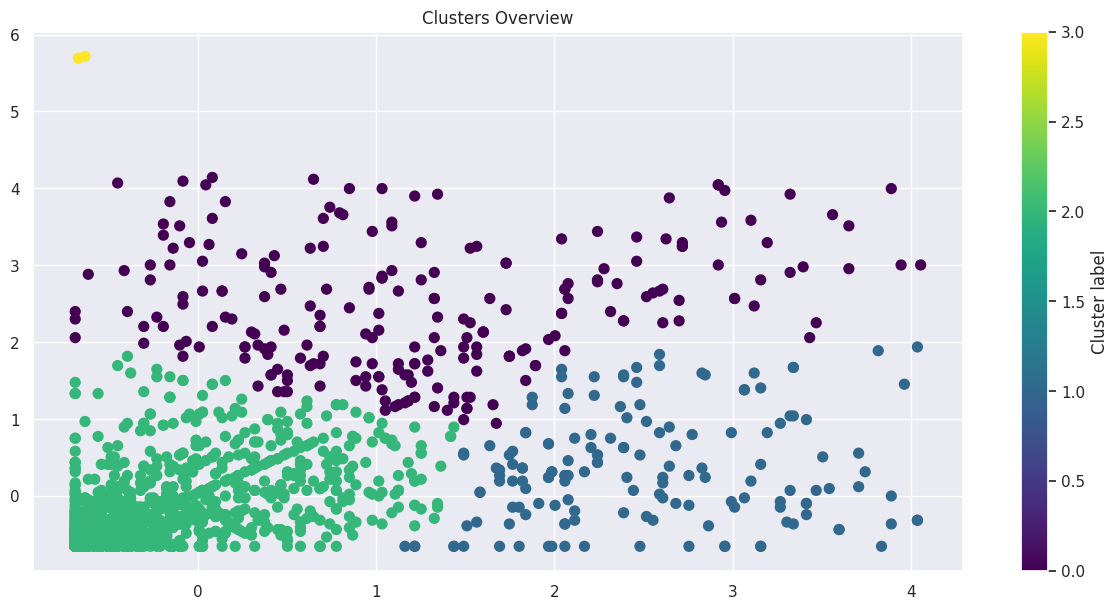

Silhouette Score: 0.6858325075085195


In [ ]:
features = ['MntFishProducts', 'MntSweetProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='average')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


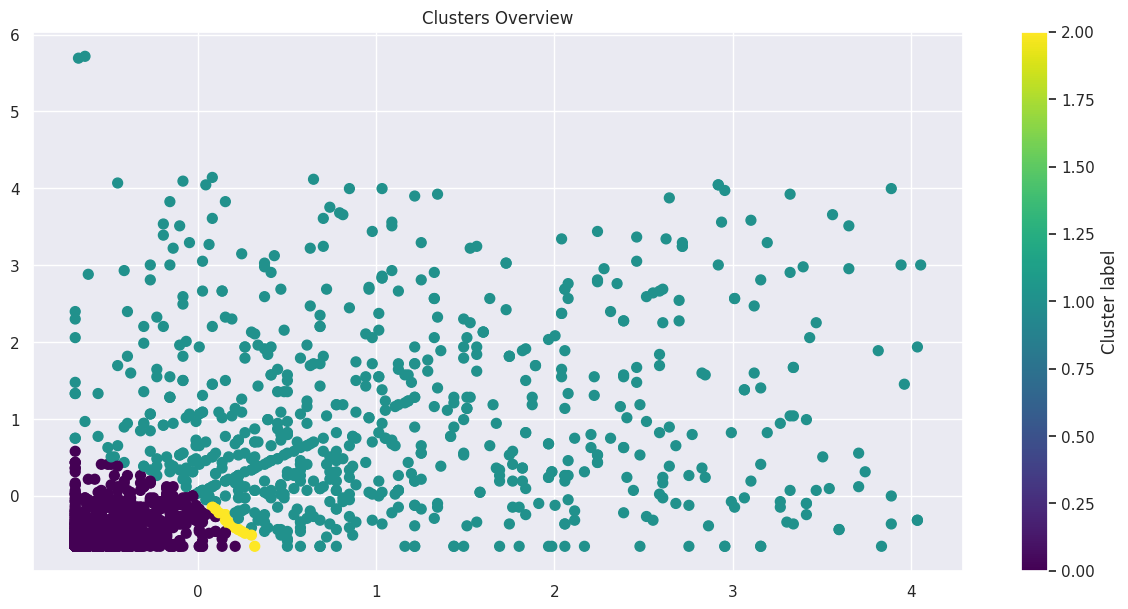

Silhouette Score: 0.35345508414885113


In [ ]:
features = ['MntFishProducts', 'MntSweetProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single')
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

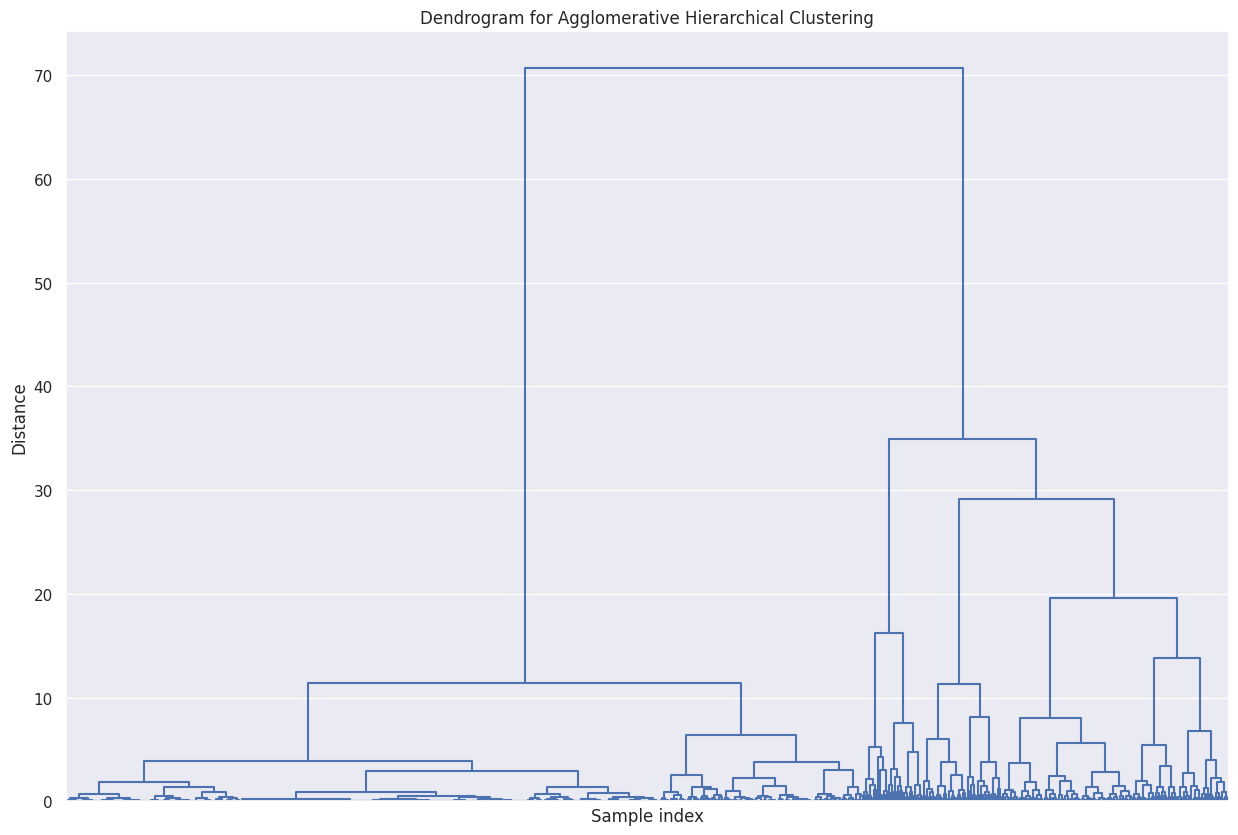

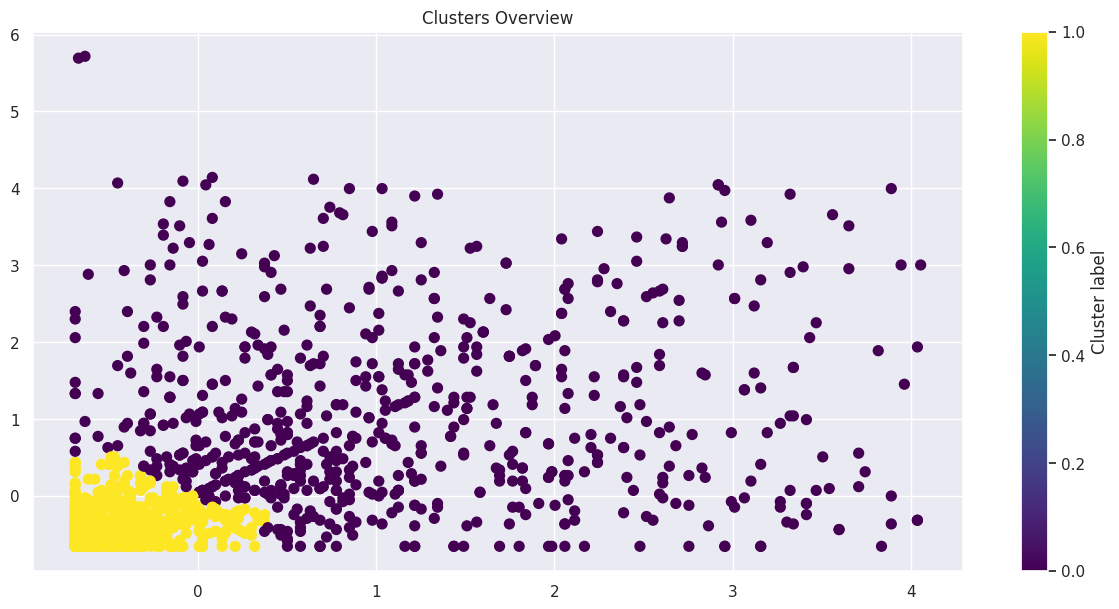

Silhouette Score: 0.6291243076831601


In [ ]:
features = ['MntFishProducts', 'MntSweetProducts']
X = df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Hierarchical clustering
agg_clust = AgglomerativeClustering()
labels = agg_clust.fit_predict(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, no_labels=True, color_threshold=0)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Optionally, review clusters on a scatter plot
plt.figure(figsize=(15, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Clusters Overview')
plt.colorbar(label='Cluster label')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

#K-Means Clustering Algorithm

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Features MntFishProducts and MntSweetProducts**

---



**Features MntFishProducts and MntSweetProducts**
Run 1

Silhouette Score: 0.6547518285253173
Sum of squared errors (SSE): 38.31787989649071


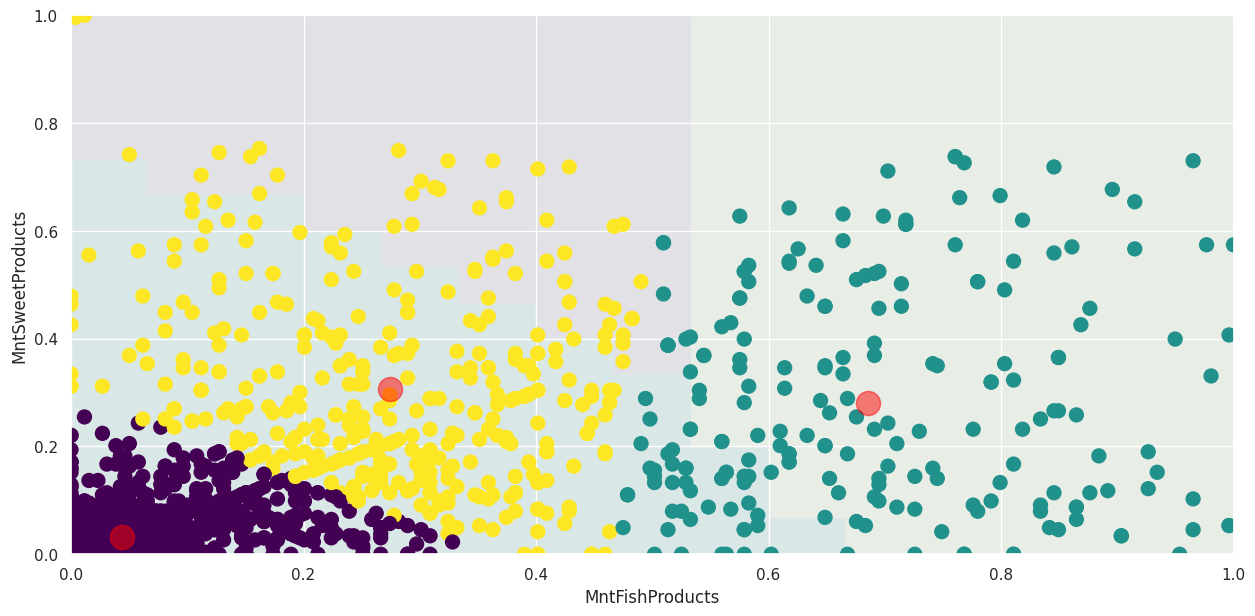

In [ ]:

X = df[['MntFishProducts', 'MntSweetProducts']].values
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=500,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
#n_init: Number of times the k-means algorithm will be run with different centroid seeds.
#terations for each single run of the k-means algorithm.

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntFishProducts', y='MntSweetProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntFishProducts')
plt.ylabel('MntSweetProducts')

plt.show()

**Features MntFishProducts and MntSweetProducts**
Run 2
with N

Silhouette Score: 0.6230958551620822
Sum of squared errors (SSE): 27.84012268057709


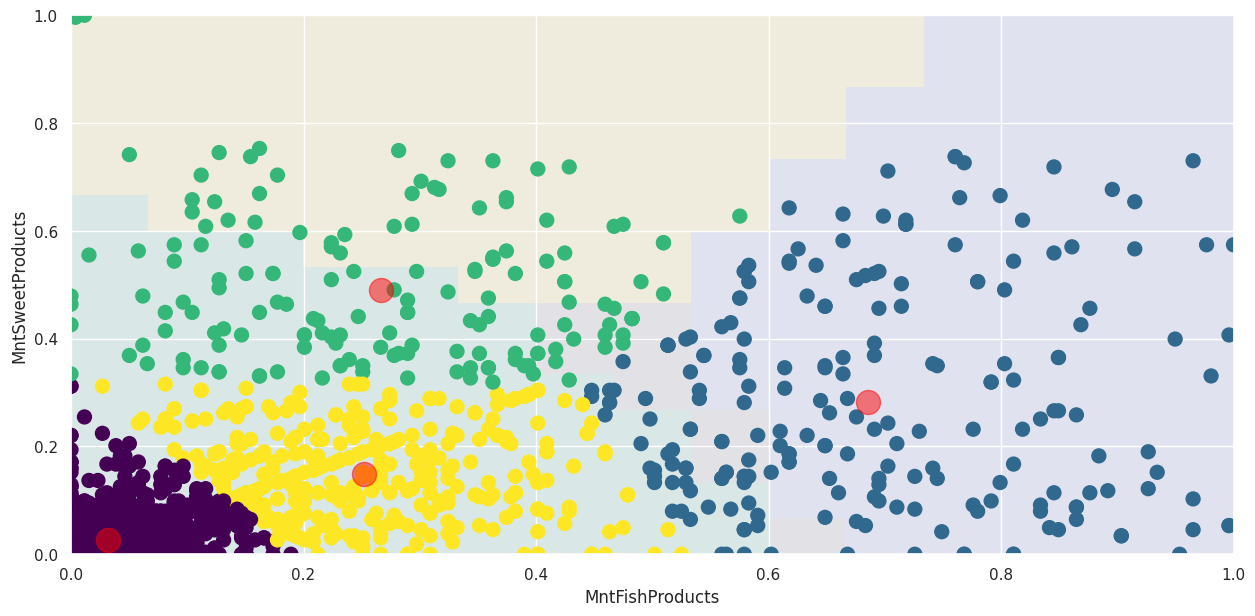

In [ ]:

X = df[['MntFishProducts', 'MntSweetProducts']].values
kmeans = (KMeans(n_clusters = 4,init='k-means++', n_init = 4 ,max_iter=400,
                        tol=0.0001,  random_state= 120, algorithm='elkan') )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntFishProducts', y='MntSweetProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntFishProducts')
plt.ylabel('MntSweetProducts')

plt.show()

**Features MntFishProducts and MntSweetProducts**
Run 3
with N

Silhouette Score: 0.6572976407714222
Sum of squared errors (SSE): 38.32768237633192


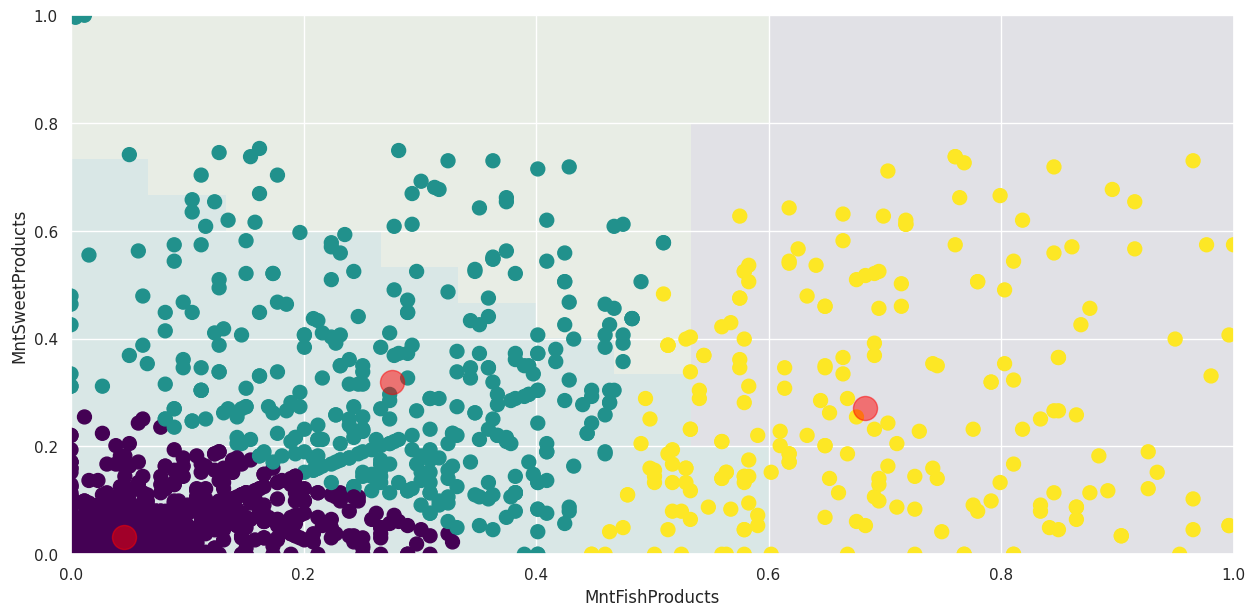

In [ ]:

X = df[['MntFishProducts', 'MntSweetProducts']].values
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 11 ,max_iter=400,
                        tol=0.01,  random_state= 111, algorithm='elkan') )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntFishProducts', y='MntSweetProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntFishProducts')
plt.ylabel('MntSweetProducts')

plt.show()

Without Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5540980740882738
Sum of squared errors (SSE): 13.260066225836049


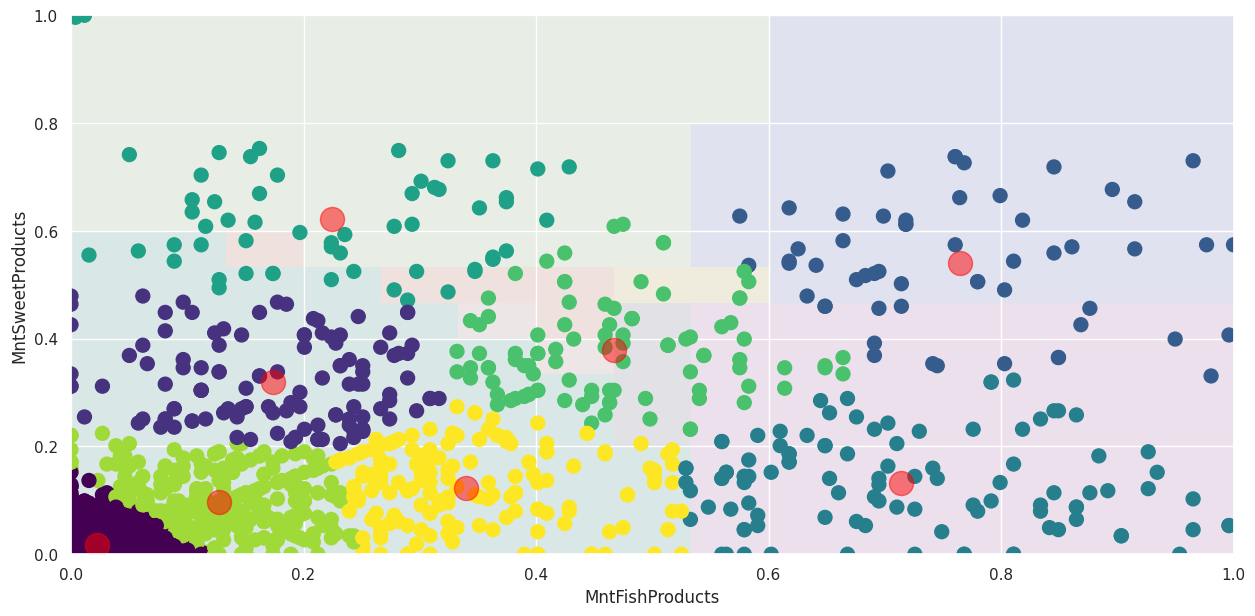

In [ ]:

X = df[['MntFishProducts', 'MntSweetProducts']].values
kmeans = (KMeans())

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)


labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntFishProducts', y='MntSweetProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntFishProducts')
plt.ylabel('MntSweetProducts')

plt.show()

**Features MntFruits and MntSweetProducts**
Run 1
with N

Silhouette Score: 0.6490872073475046
Sum of squared errors (SSE): 37.883985955671555


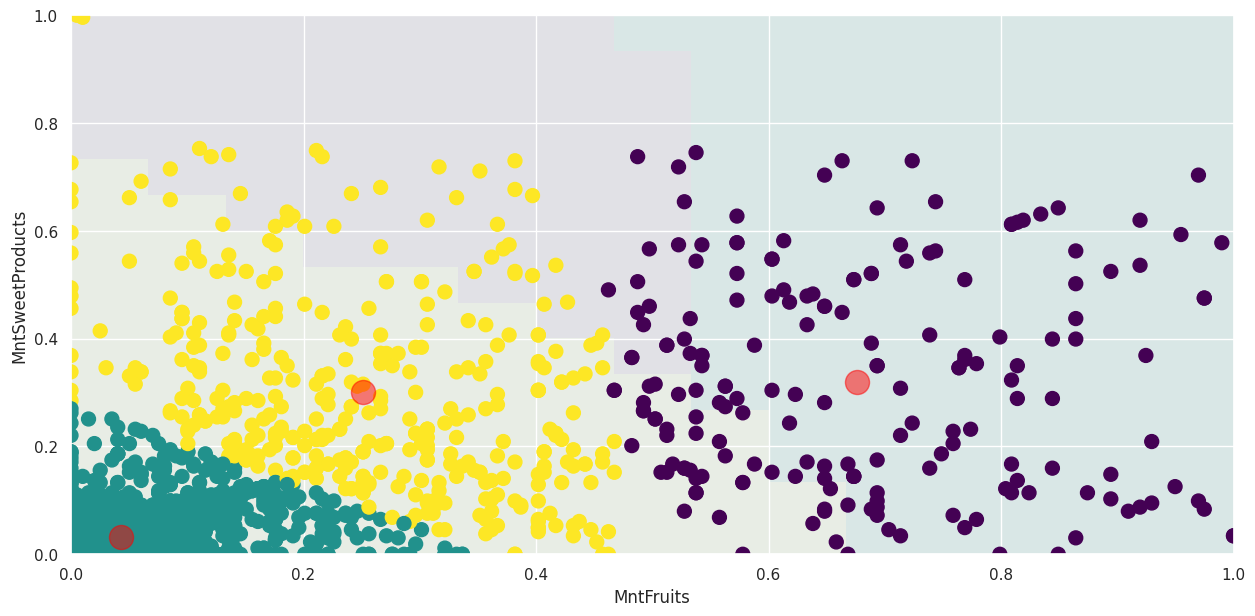

In [ ]:

X = df[['MntFruits', 'MntSweetProducts']].values
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=500,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntFruits', y='MntSweetProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntFruits')
plt.ylabel('MntSweetProducts')

plt.show()

**Features MntFruits and MntSweetProducts**
Run 2


Silhouette Score: 0.6213678459995808
Sum of squared errors (SSE): 26.79370350184201


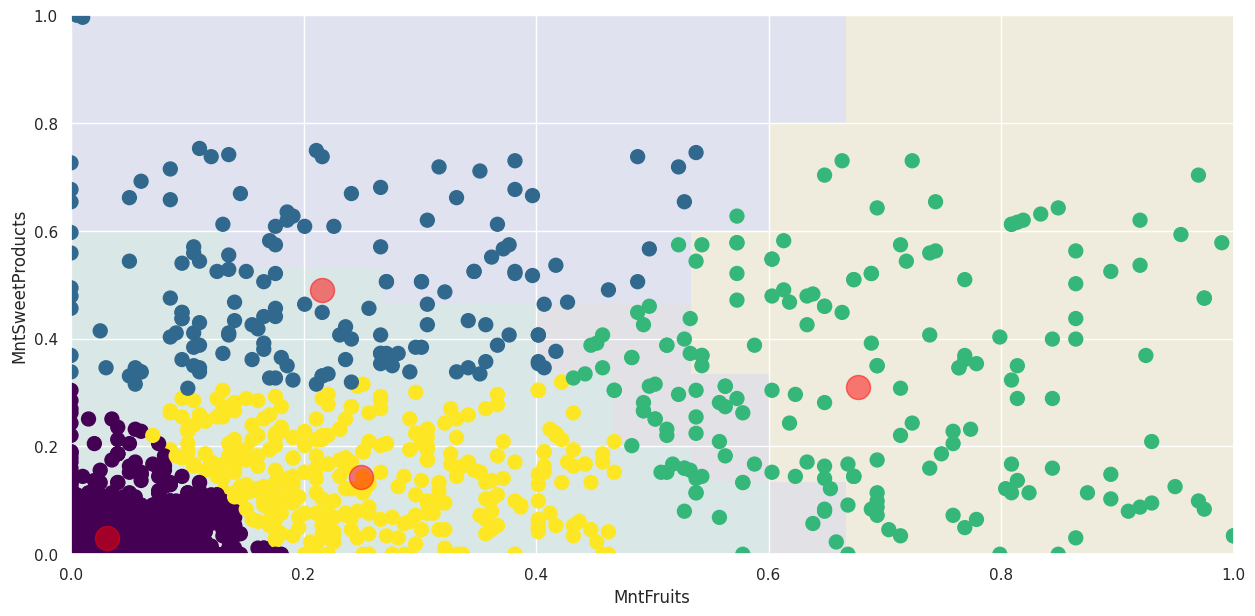

In [ ]:

X = df[['MntFruits', 'MntSweetProducts']].values
kmeans = (KMeans(n_clusters = 4,init='k-means++', n_init = 10 ,max_iter=400,
                        tol=0.01,  random_state= 120, algorithm='elkan') )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)


labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntFruits', y='MntSweetProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntFruits')
plt.ylabel('MntSweetProducts')

plt.show()

**Features MntFruits and MntSweetProducts**
Run 3

Silhouette Score: 0.6488312013605636
Sum of squared errors (SSE): 37.89053580314459


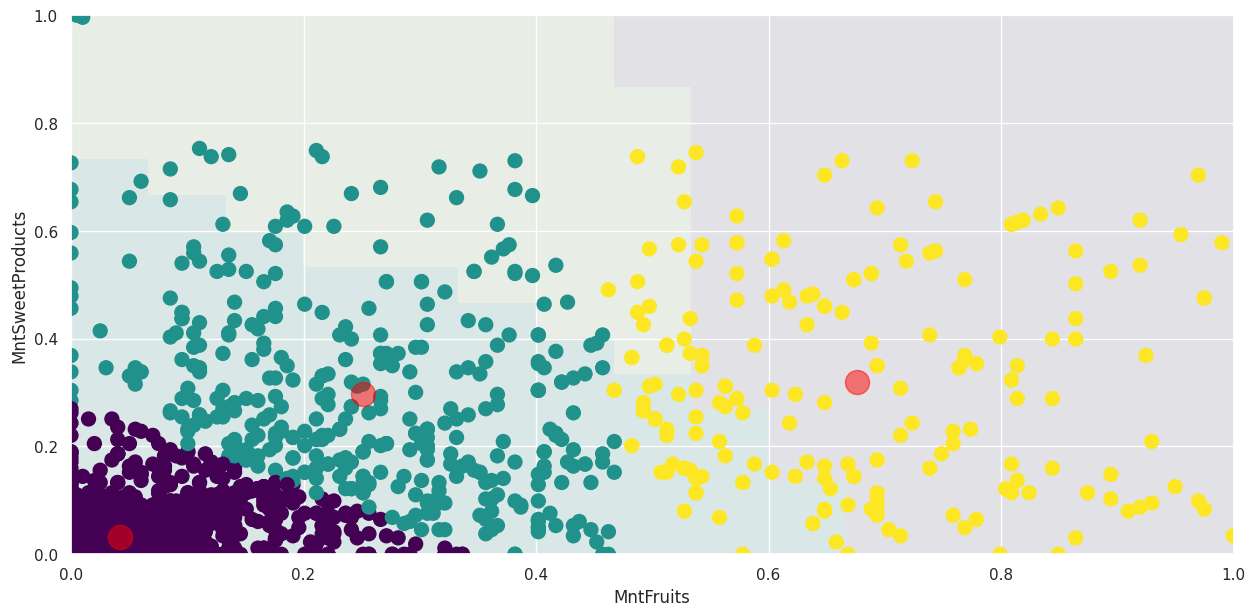

In [ ]:

X = df[['MntFruits', 'MntSweetProducts']].values
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 15 ,max_iter=300,
                        tol=0.01,  random_state= 210, algorithm='elkan') )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)


labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntFruits', y='MntSweetProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntFruits')
plt.ylabel('MntSweetProducts')

plt.show()

Without Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5436725745599661
Sum of squared errors (SSE): 12.640489478538733


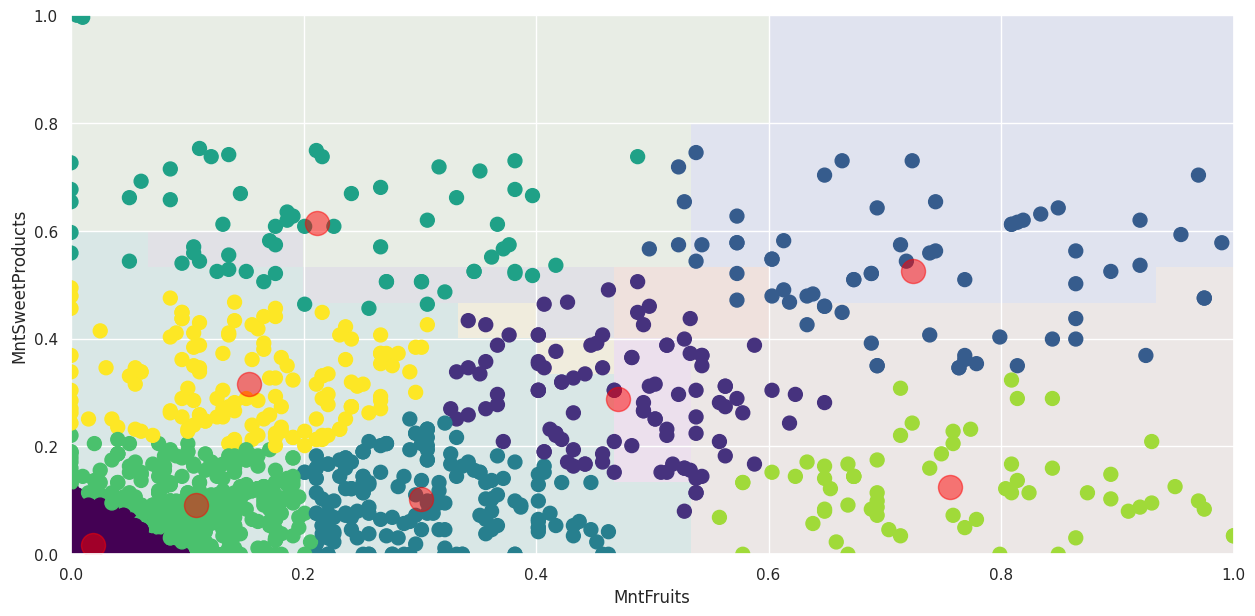

In [ ]:

X = df[['MntFruits', 'MntSweetProducts']].values
kmeans = (KMeans() )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntFruits', y='MntSweetProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntFruits')
plt.ylabel('MntSweetProducts')

plt.show()

**Features MntMeatProducts	MntFishProducts	**

Run 1


Silhouette Score: 0.6427765737542739
Sum of squared errors (SSE): 30.309857631018712


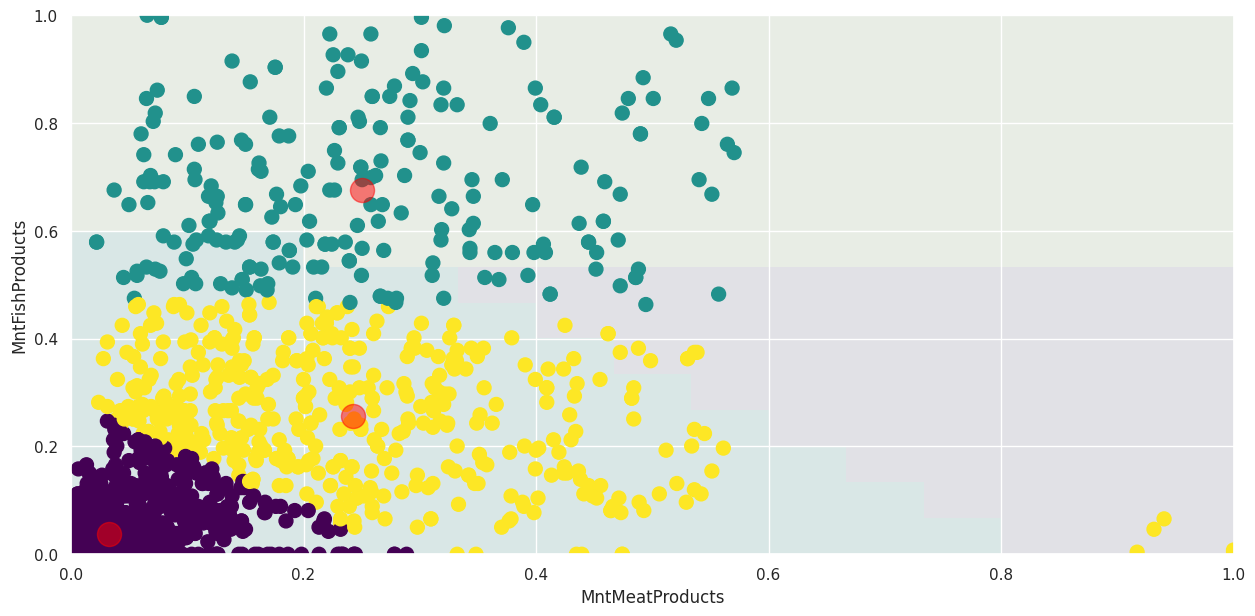

In [ ]:

X = df[['MntMeatProducts', 'MntFishProducts']].values
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=500,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)


labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntMeatProducts', y='MntFishProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntMeatProducts')
plt.ylabel('MntFishProducts')

plt.show()

**Features MntMeatProducts and MntFishProducts**
Run 2
with N

Silhouette Score: 0.6433636429520058
Sum of squared errors (SSE): 22.685637280080325


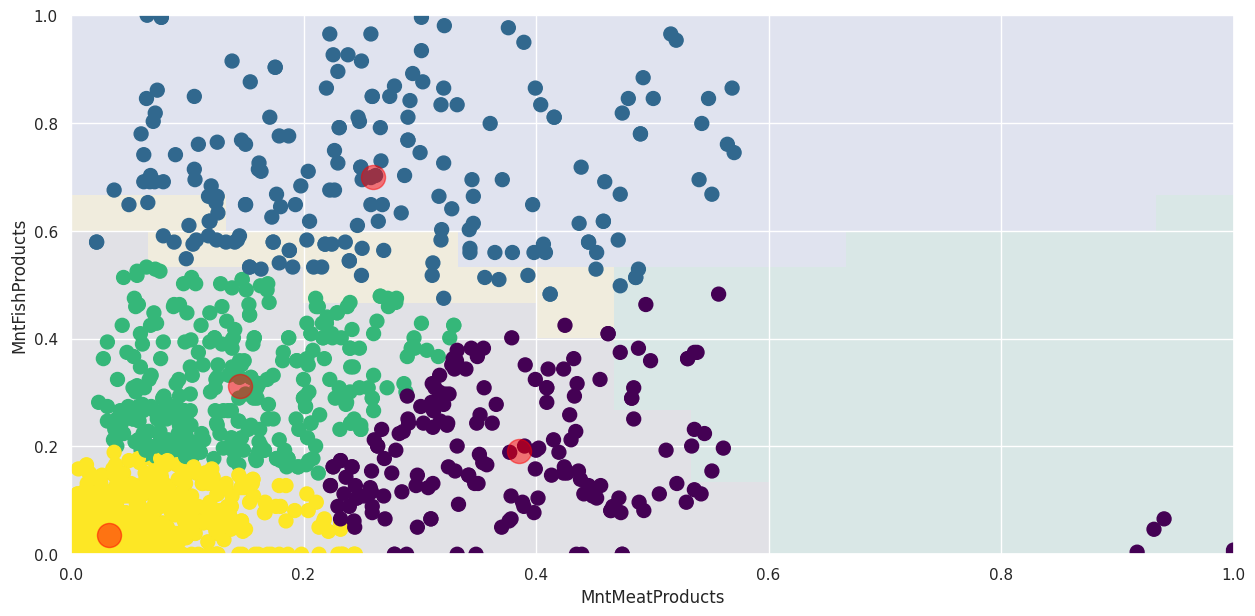

In [ ]:

X = df[['MntMeatProducts', 'MntFishProducts']].values
kmeans = (KMeans(n_clusters = 4,init='k-means++', n_init = 4 ,max_iter=400,
                        tol=0.0001,  random_state= 120, algorithm='elkan') )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntMeatProducts', y='MntFishProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntMeatProducts')
plt.ylabel('MntFishProducts')

plt.show()

**Features MntMeatProducts and MntFishProducts**
Run 3

Silhouette Score: 0.643602658588969
Sum of squared errors (SSE): 30.310286010197302


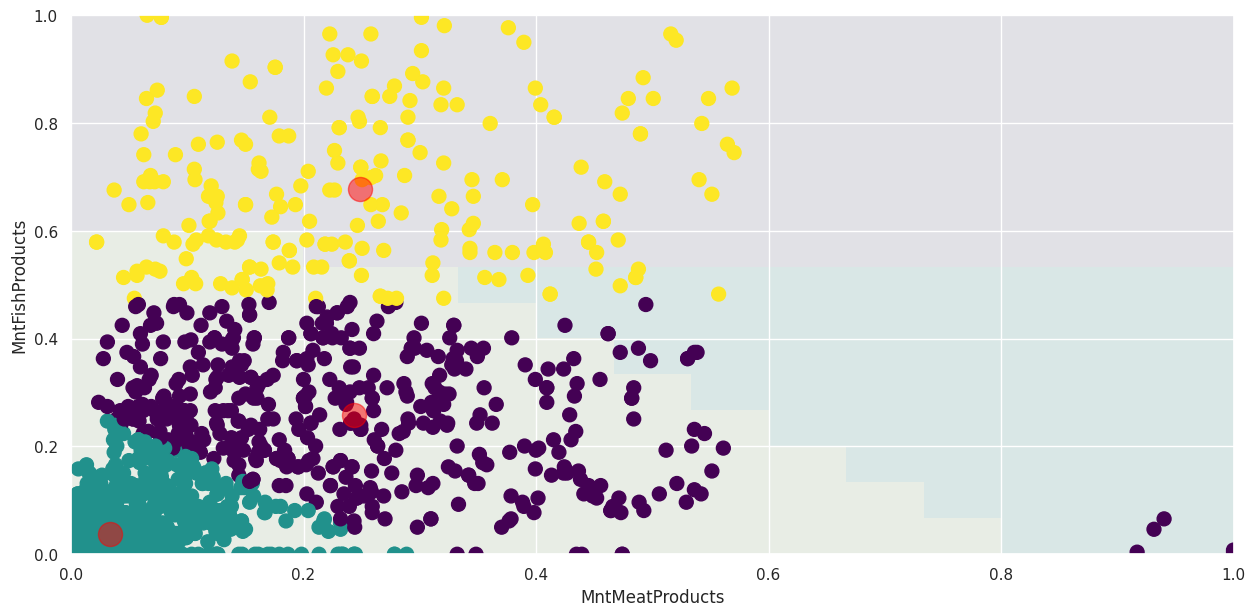

In [ ]:

X = df[['MntMeatProducts', 'MntFishProducts']].values
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 15 ,max_iter=200,
                        tol=0.0001,  random_state= 190, algorithm='elkan') )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntMeatProducts', y='MntFishProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntMeatProducts')
plt.ylabel('MntFishProducts')

plt.show()

Without tuning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5640843643921848
Sum of squared errors (SSE): 11.821689106018843


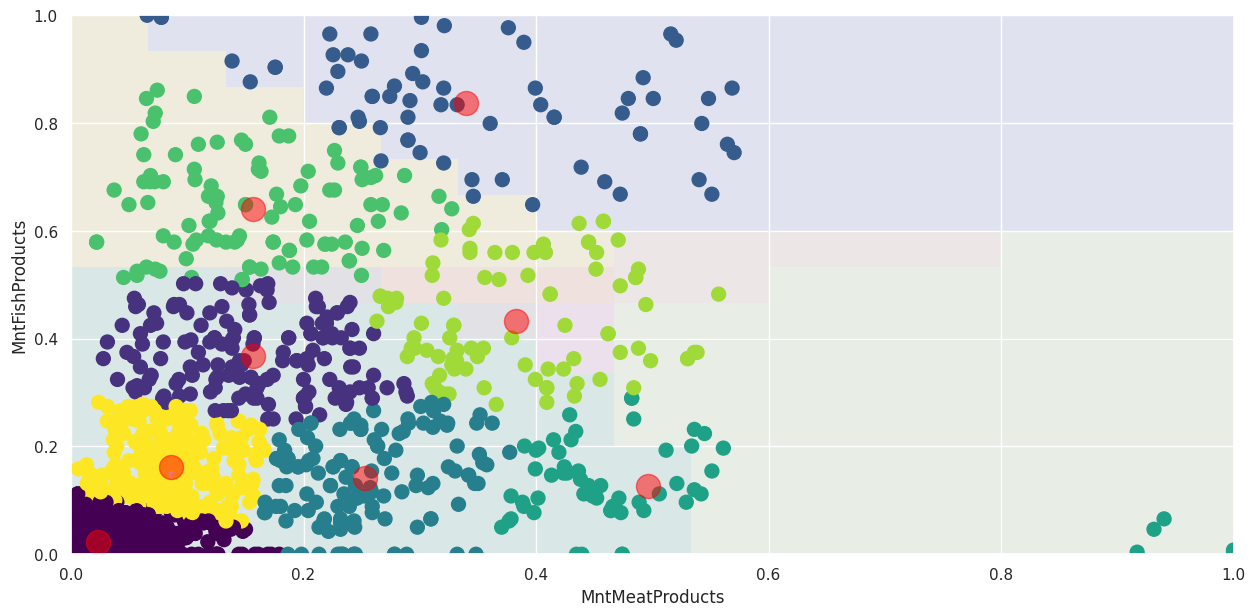

In [ ]:

X = df[['MntMeatProducts', 'MntFishProducts']].values
kmeans = (KMeans() )

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette Score:", silhouette_avg)

sse = kmeans.inertia_
print("Sum of squared errors (SSE):", sse)



labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
h = 0.2

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 7))
plt.clf()

plt.imshow(Z, interpolation='nearest', extent=(0.0, 1.0, 0.0, 1.0), cmap=plt.cm.Pastel2, aspect='auto', origin='lower', alpha=0.3)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.scatter(x='MntMeatProducts', y='MntFishProducts', data=df, c=labels1, s=100, cmap='viridis')

plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.xlabel('MntMeatProducts')
plt.ylabel('MntFishProducts')

plt.show()

#DBSCAN Clustering Algorithm

**Density-Based Spatial Clustering of Applications
with Noise (DBSCAN)**

Feature set 1: ['MntFruits', 'MntSweetProducts']

Run 1

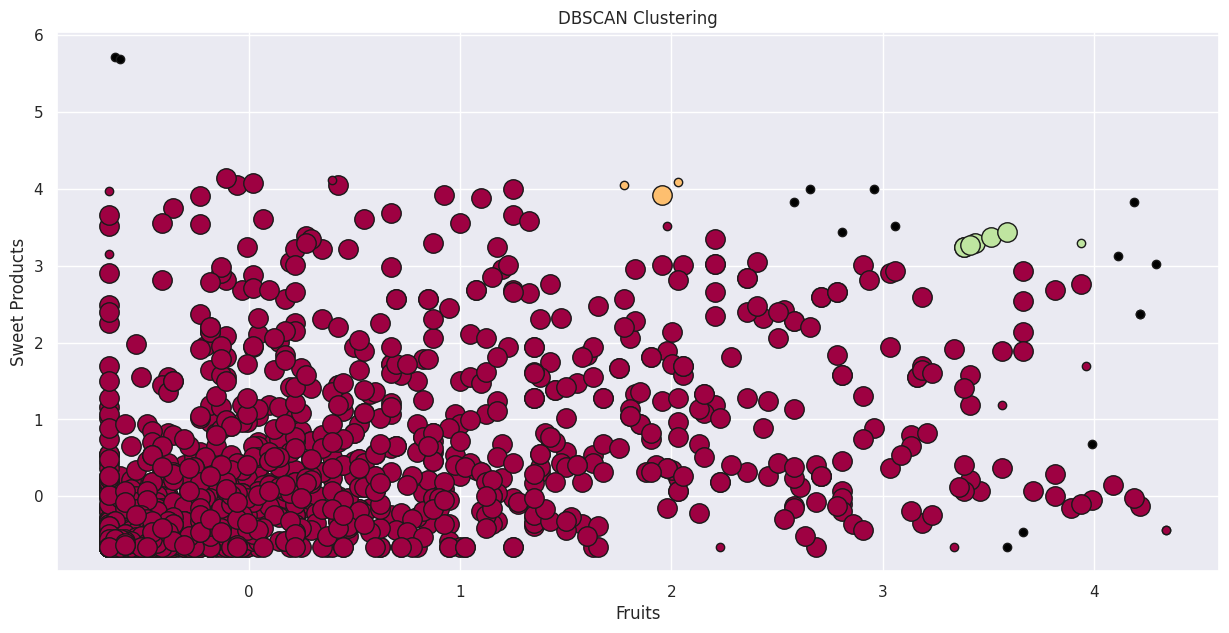

Silhouette Score: 0.633073451153296


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = df[['MntFruits', 'MntSweetProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.5, min_samples= 4, metric='manhattan')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fruits')
plt.ylabel('Sweet Products')
plt.show()


silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)


Run 2

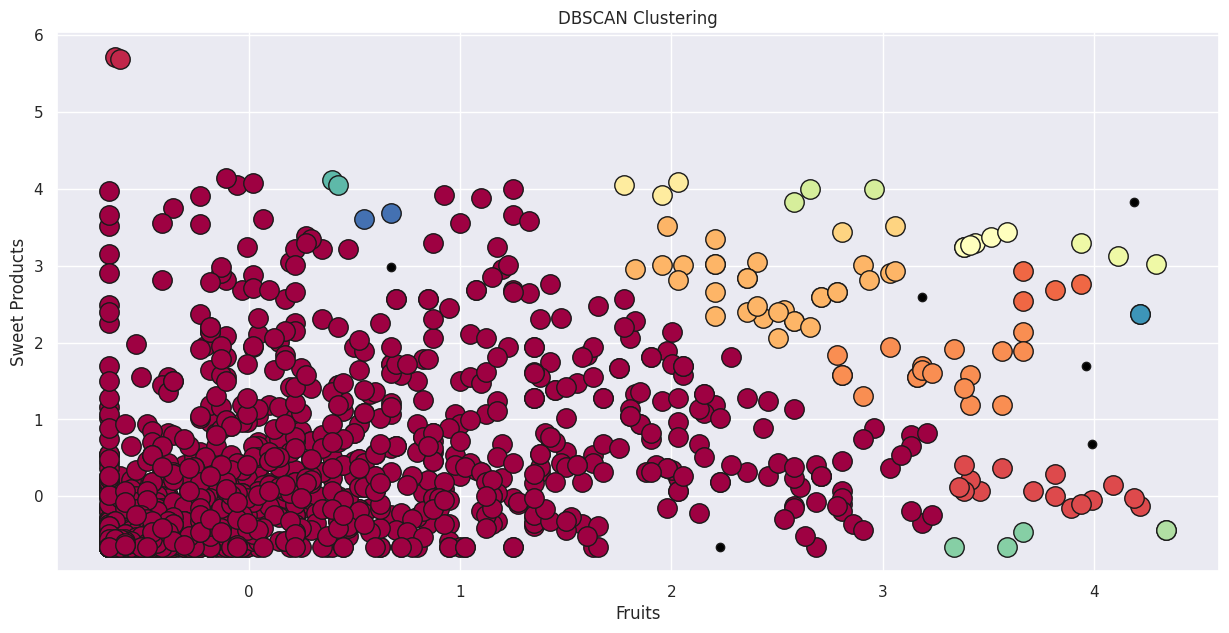

Silhouette Score: 0.5864660063137497


In [ ]:
X = df[['MntFruits', 'MntSweetProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.40, min_samples= 2, metric='manhattan')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fruits')
plt.ylabel('Sweet Products')
plt.show()


silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Run 3

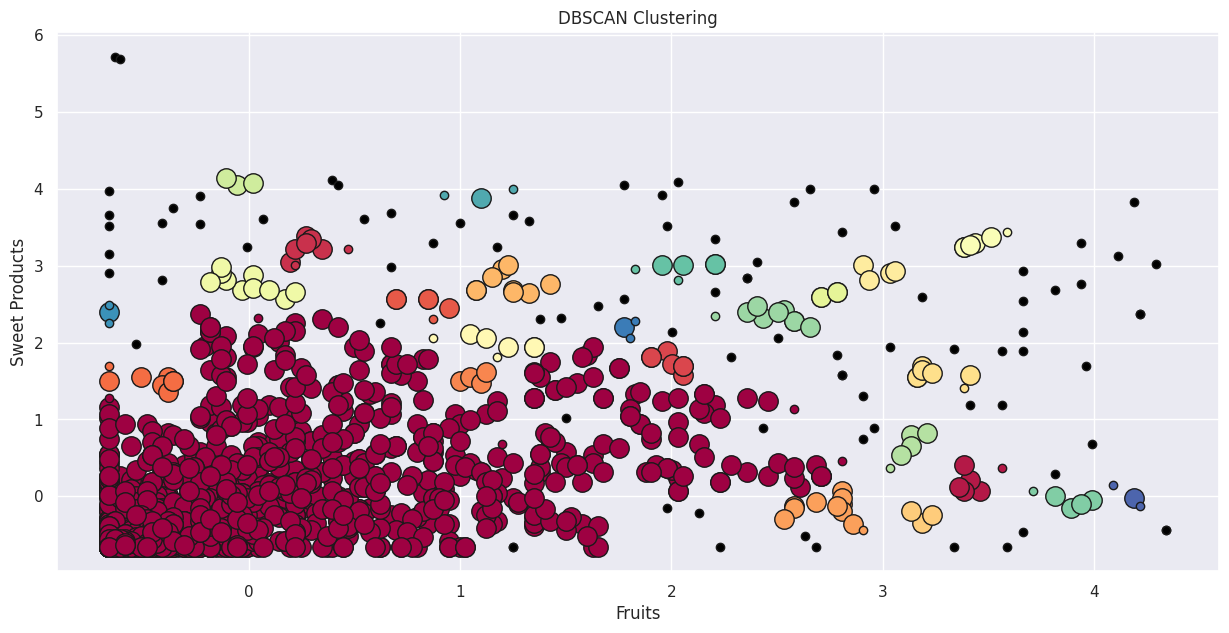

Silhouette Score: 0.4084065592876764


In [ ]:
X = df[['MntFruits', 'MntSweetProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.2, min_samples= 3, metric='euclidean')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fruits')
plt.ylabel('Sweet Products')
plt.show()


silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Feature set 2: MntFishProducts, MntMeatProducts

Run 1

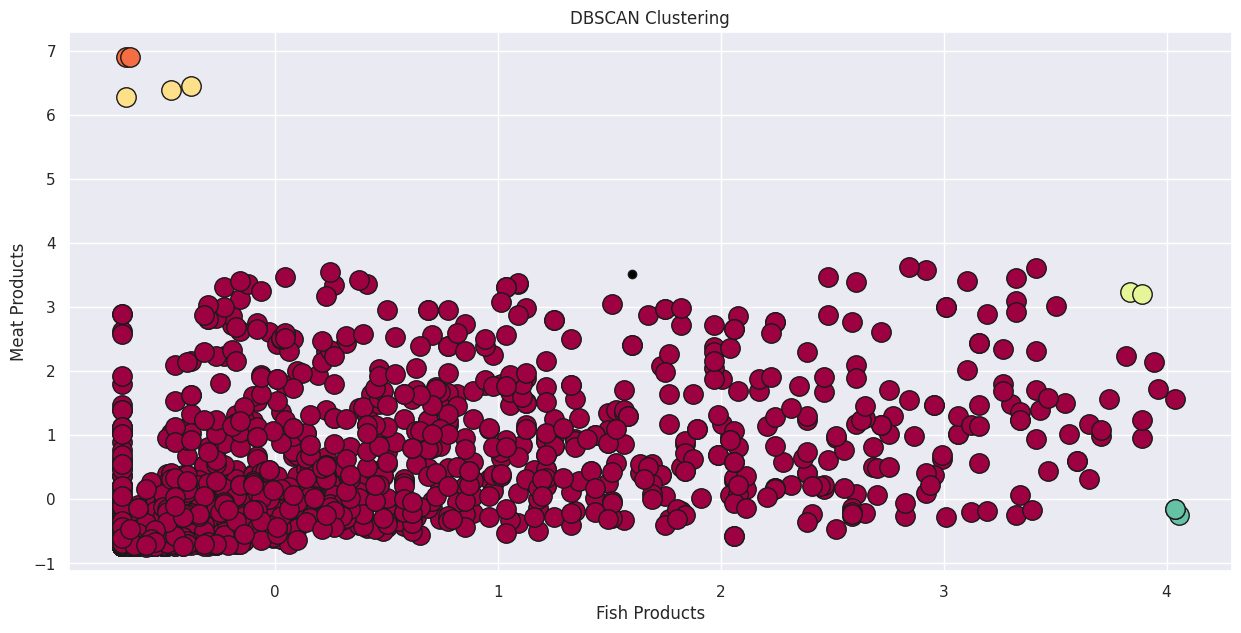

Silhouette Score: 0.5430728644948183


In [ ]:
X = df[['MntFishProducts', 'MntMeatProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.5, min_samples= 2, metric='manhattan')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fish Products')
plt.ylabel('Meat Products')
plt.show()


silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Run 2

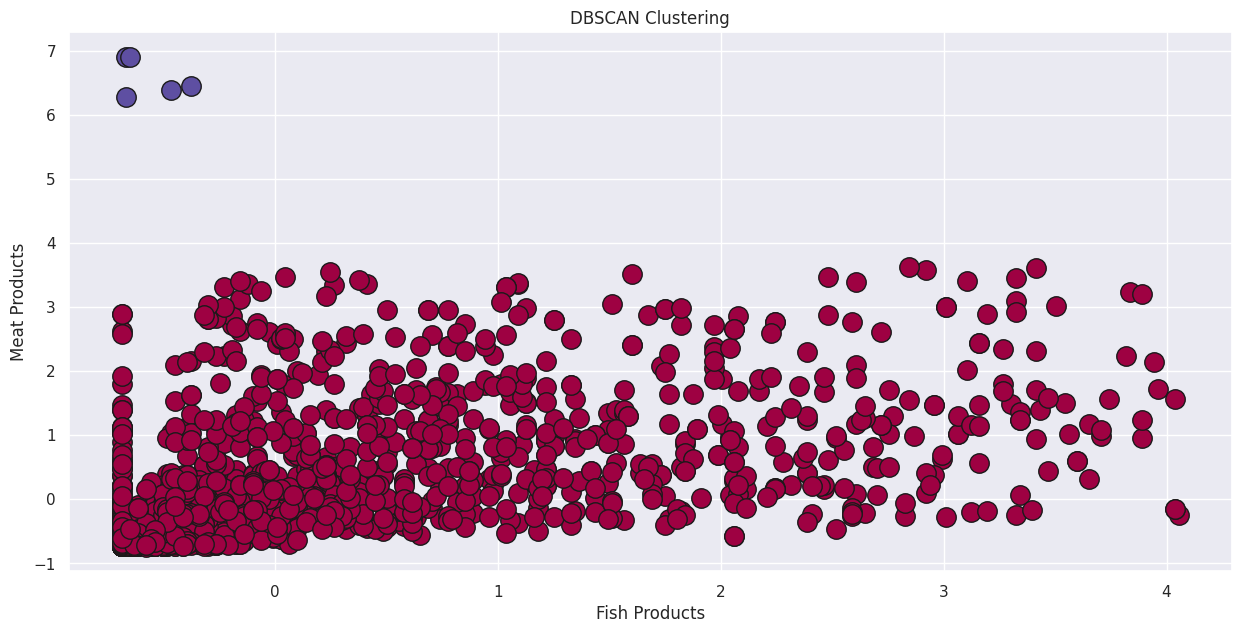

Silhouette Score: 0.7678400393577492


In [ ]:
X = df[['MntFishProducts', 'MntMeatProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.8, min_samples= 2, metric='manhattan')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fish Products')
plt.ylabel('Meat Products')
plt.show()

silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Run 3

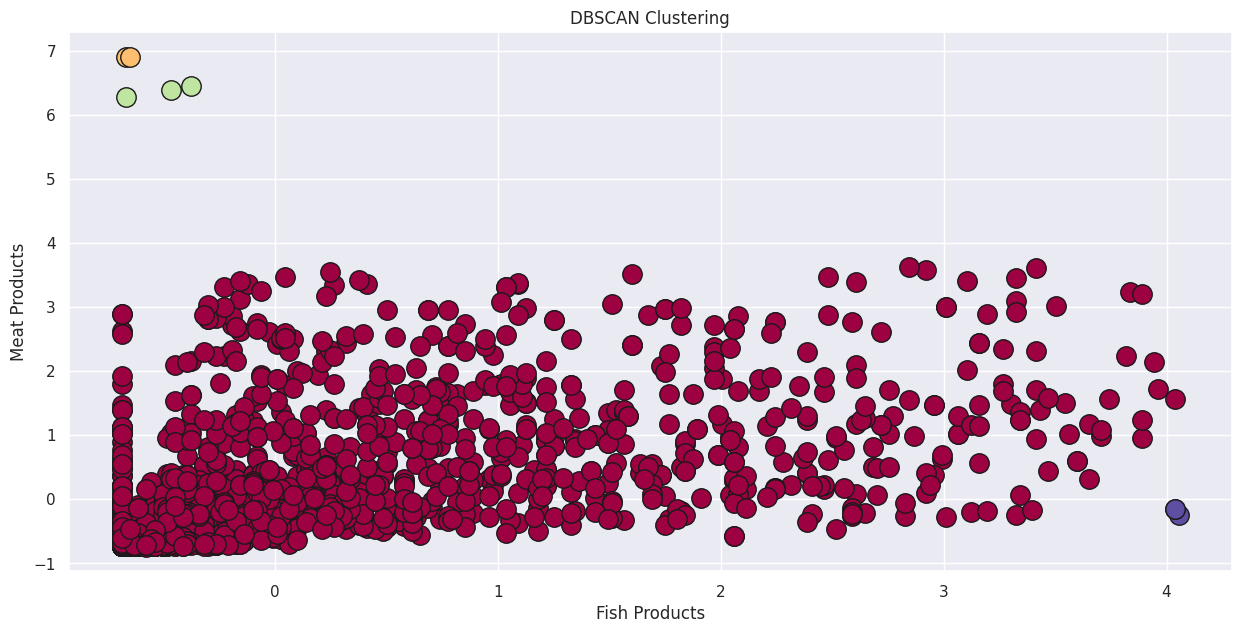

Silhouette Score: 0.6070519518965913


In [ ]:
X = df[['MntFishProducts', 'MntMeatProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.5, min_samples= 2, metric='euclidean')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fish Products')
plt.ylabel('Meat Products')
plt.show()


silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Feature set 3: MntFishProducts, MntSweetProducts


Run 1

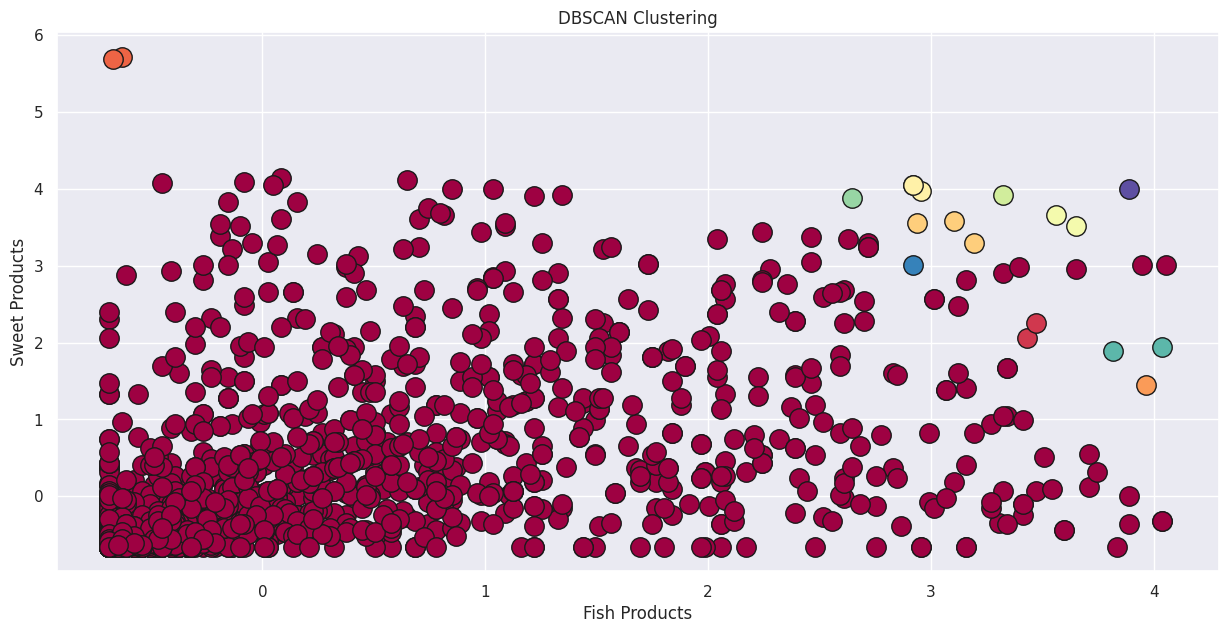

Silhouette Score: 0.5854570064227257


In [ ]:
X = df[['MntFishProducts', 'MntSweetProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.4, min_samples=1, metric='manhattan')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fish Products')
plt.ylabel('Sweet Products')
plt.show()


silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Run 2

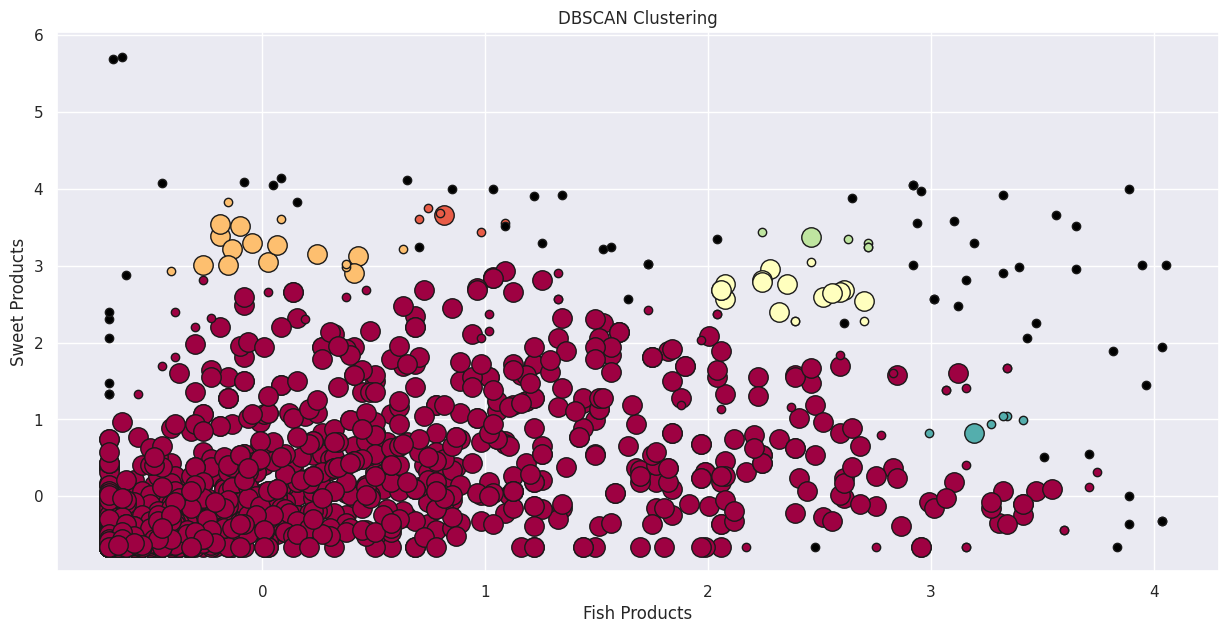

Silhouette Score: 0.5347220009574254


In [ ]:
X = df[['MntFishProducts', 'MntSweetProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.3, min_samples= 6, metric='euclidean')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fish Products')
plt.ylabel('Sweet Products')
plt.show()


silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

Run 3

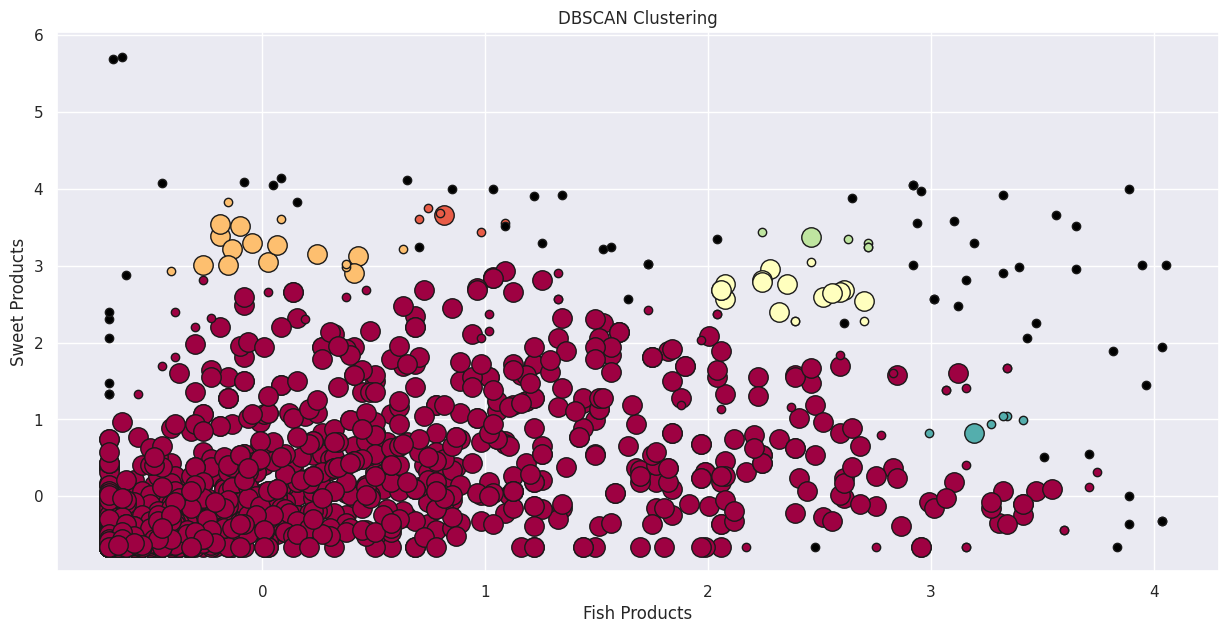

Silhouette Score: 0.5347220009574254


In [ ]:
X = df[['MntFishProducts', 'MntSweetProducts']].values

X_scaled = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps= 0.3, min_samples= 6, metric='euclidean')  # eps and min_samples need to be adjusted
y_dbscan = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(15, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # Plot non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Fish Products')
plt.ylabel('Sweet Products')
plt.show()



silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)